<a href="https://colab.research.google.com/github/enatan1/python-repo-/blob/main/code_for_the_EDA_for_the_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# -------------------------
# 1. Load data (Colab path)
# -------------------------
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


summary of number of species for each year


In [3]:
import pandas as pd

# 1. Load the data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Categorize the parasites into Mites and Fleas based on Genus
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]

parasite_cols = df.columns[2:] # All columns from the 3rd column onwards
mite_cols = [c for c in parasite_cols if c.split('_')[0] not in flea_genera]
flea_cols = [c for c in parasite_cols if c.split('_')[0] in flea_genera]

# 3. Create the yearly summary
yearly_summary = df.groupby('YearCollected').apply(lambda x: pd.Series({
    'Host_Richness': x['Host'].nunique(),
    'Host_Abundance': len(x),
    'Mite_Richness': (x[mite_cols].sum() > 0).sum(),
    'Mite_Abundance': x[mite_cols].values.sum(),
    'Flea_Richness': (x[flea_cols].sum() > 0).sum(),
    'Flea_Abundance': x[flea_cols].values.sum()
})).reset_index()

# 4. Display the results
print(yearly_summary)

# Optional: Save to a new excel file
# yearly_summary.to_excel("Yearly_Summary.xlsx", index=False)

   YearCollected  Host_Richness  Host_Abundance  Mite_Richness  \
0           1982             21            1194             34   
1           1983             22            1129             34   
2           1984             21            1280             35   
3           1985             22            2009             26   
4           1986             20            2503             28   
5           1987             21            1042             24   

   Mite_Abundance  Flea_Richness  Flea_Abundance  
0            2544             12            2471  
1            3309             12            1381  
2            6230             12            3077  
3            2627             11            2743  
4            2579             13            4529  
5            1197             10            3492  


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/tmp/ipython-input-2305972528.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_summary = df.groupby('YearCollected').apply(lambda x: pd.Series({


plotting this data

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/tmp/ipython-input-3984720583.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary = df.groupby('YearCollected').apply(lambda x: pd.Series({


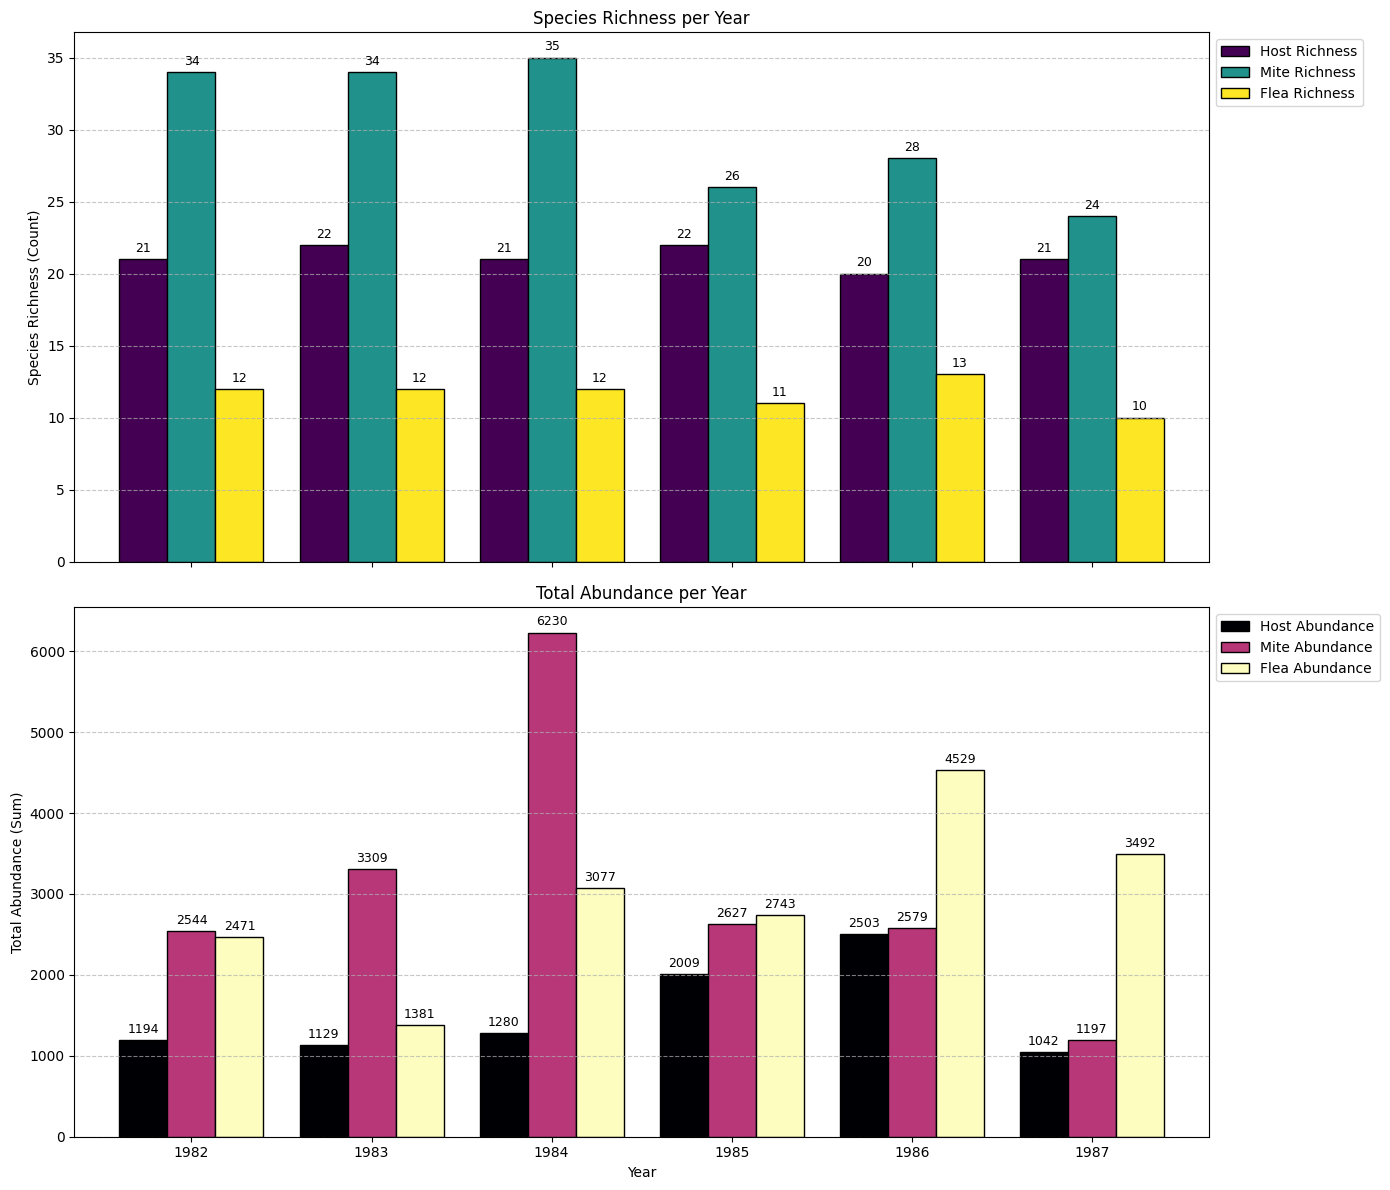

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data from your path
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Categorization
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]
parasite_cols = df.columns[2:]
mite_cols = [c for c in parasite_cols if c.split('_')[0] not in flea_genera]
flea_cols = [c for c in parasite_cols if c.split('_')[0] in flea_genera]

# 3. Create yearly summary
summary = df.groupby('YearCollected').apply(lambda x: pd.Series({
    'Host Richness': x['Host'].nunique(),
    'Host Abundance': len(x),
    'Mite Richness': (x[mite_cols].sum() > 0).sum(),
    'Mite Abundance': x[mite_cols].values.sum(),
    'Flea Richness': (x[flea_cols].sum() > 0).sum(),
    'Flea Abundance': x[flea_cols].values.sum()
})).reset_index()

# 4. Create the plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot 1: Richness
summary.plot(x='YearCollected', y=['Host Richness', 'Mite Richness', 'Flea Richness'],
             kind='bar', ax=ax1, colormap='viridis', edgecolor='black', width=0.8)
ax1.set_ylabel('Species Richness (Count)')
ax1.set_title('Species Richness per Year')
ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars for ax1
for container in ax1.containers:
    ax1.bar_label(container, padding=3, fontsize=9)

# Plot 2: Abundance
summary.plot(x='YearCollected', y=['Host Abundance', 'Mite Abundance', 'Flea Abundance'],
             kind='bar', ax=ax2, colormap='magma', edgecolor='black', width=0.8)
ax2.set_ylabel('Total Abundance (Sum)')
ax2.set_title('Total Abundance per Year')
ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars for ax2
for container in ax2.containers:
    ax2.bar_label(container, padding=3, fontsize=9)

plt.xlabel('Year')
plt.xticks(rotation=0)
plt.tight_layout()

# Save and Show
plt.savefig('species_yearly_with_labels.png')
plt.show()

the abundence of host and parasite species

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


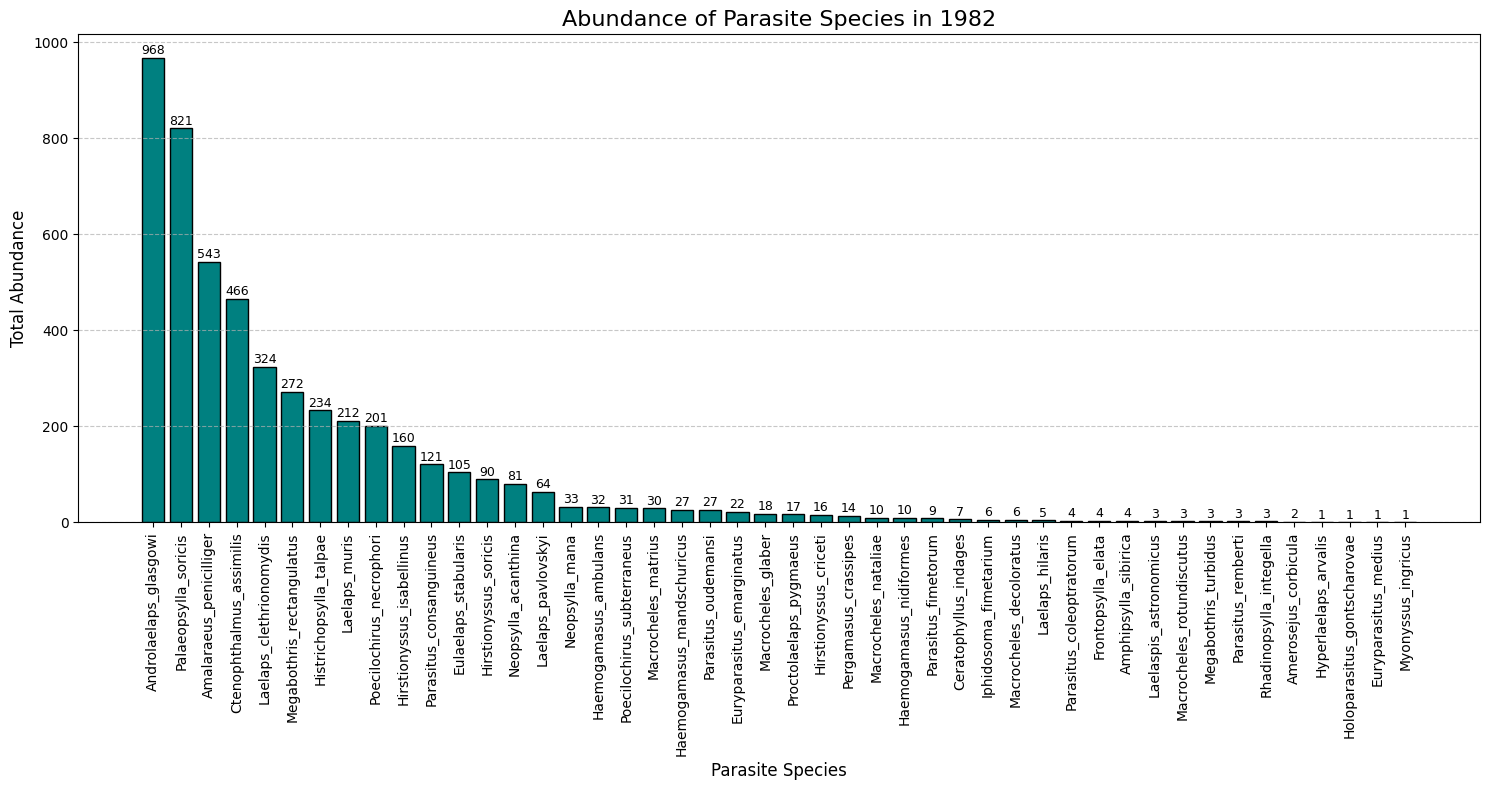

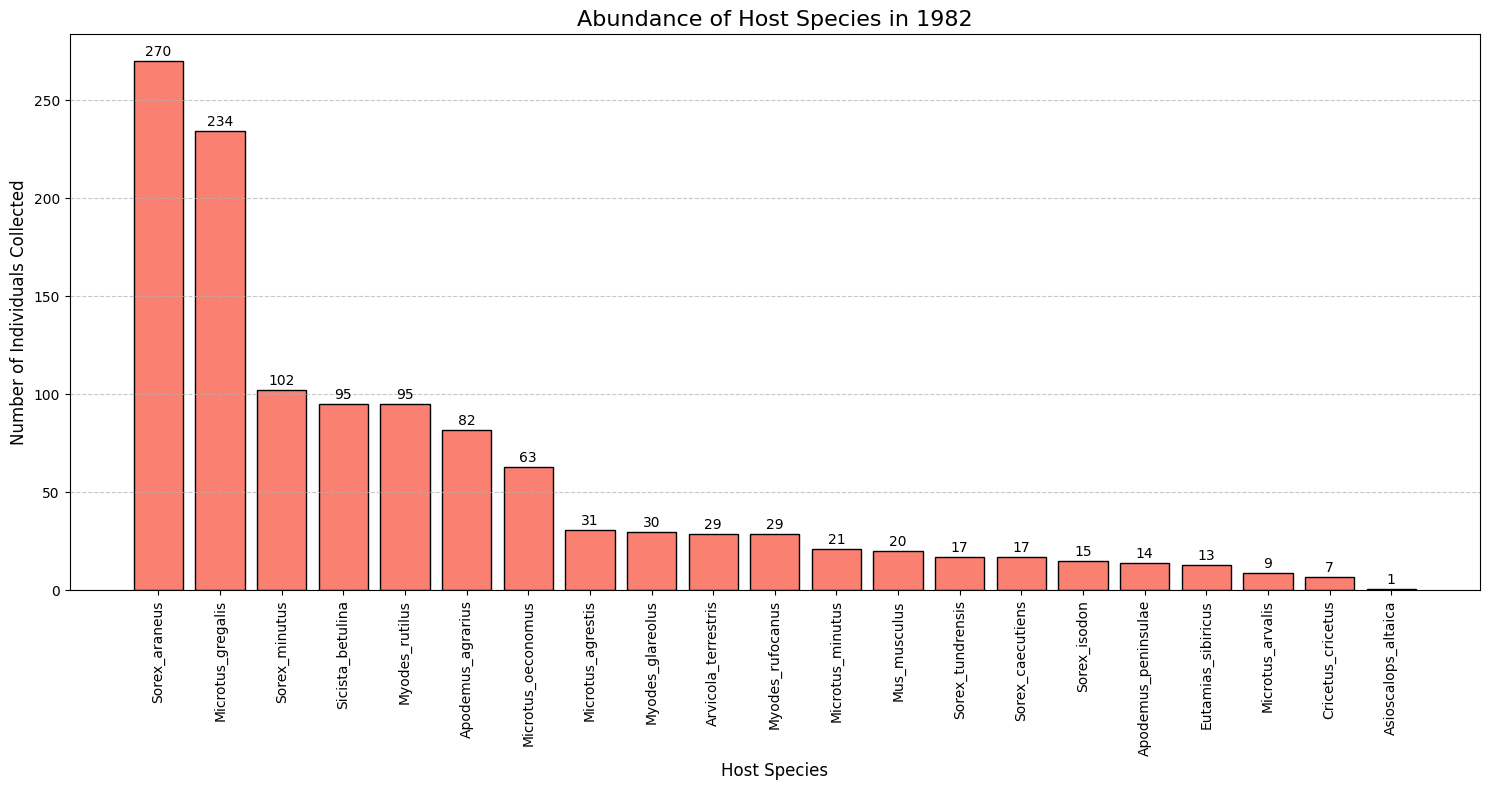

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Filter for the year 1982
df_1982 = df[df['YearCollected'] == 1982]

# 3. Identify parasite columns (all columns except 'YearCollected' and 'Host')
parasite_cols = df.columns[2:]

# 4. Sum the abundance for each species in 1982
species_abundance = df_1982[parasite_cols].sum().reset_index()
species_abundance.columns = ['Species', 'Abundance']

# 5. Filter out species not present in 1982 and sort
species_abundance = species_abundance[species_abundance['Abundance'] > 0]
species_abundance = species_abundance.sort_values(by='Abundance', ascending=False)

# 6. Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(species_abundance['Species'], species_abundance['Abundance'], color='teal', edgecolor='black')

# Add number labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=9)

plt.title('Abundance of Parasite Species in 1982', fontsize=16)
plt.ylabel('Total Abundance', fontsize=12)
plt.xlabel('Parasite Species', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()




# 2. Filter for the year 1982
df_1982 = df[df['YearCollected'] == 1982]

# 3. Calculate host abundance (number of individuals of each species)
host_abundance = df_1982['Host'].value_counts().reset_index()
host_abundance.columns = ['Host', 'Abundance']

# 4. Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(host_abundance['Host'], host_abundance['Abundance'], color='salmon', edgecolor='black')

# Add number labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.title('Abundance of Host Species in 1982', fontsize=16)
plt.ylabel('Number of Individuals Collected', fontsize=12)
plt.xlabel('Host Species', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


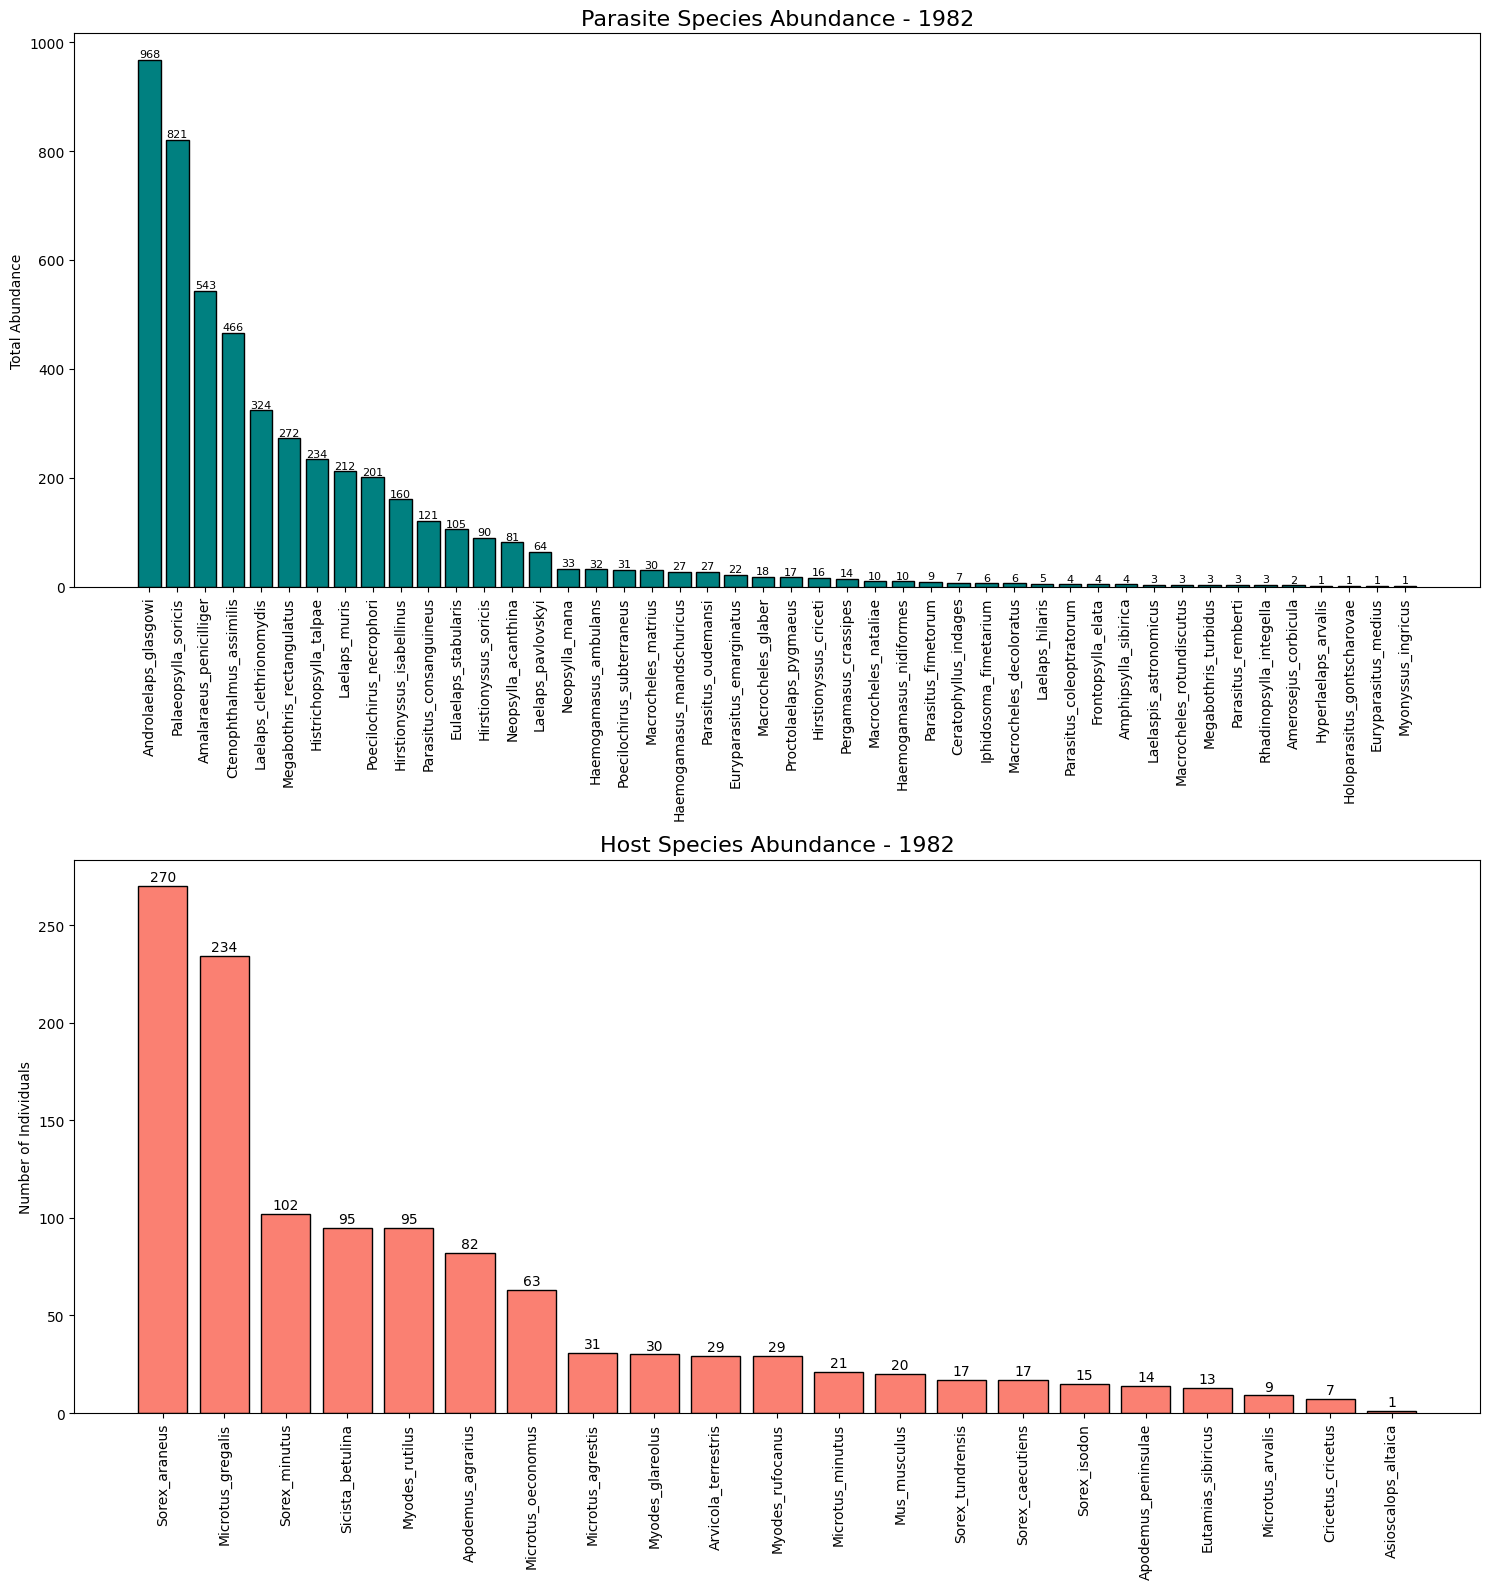

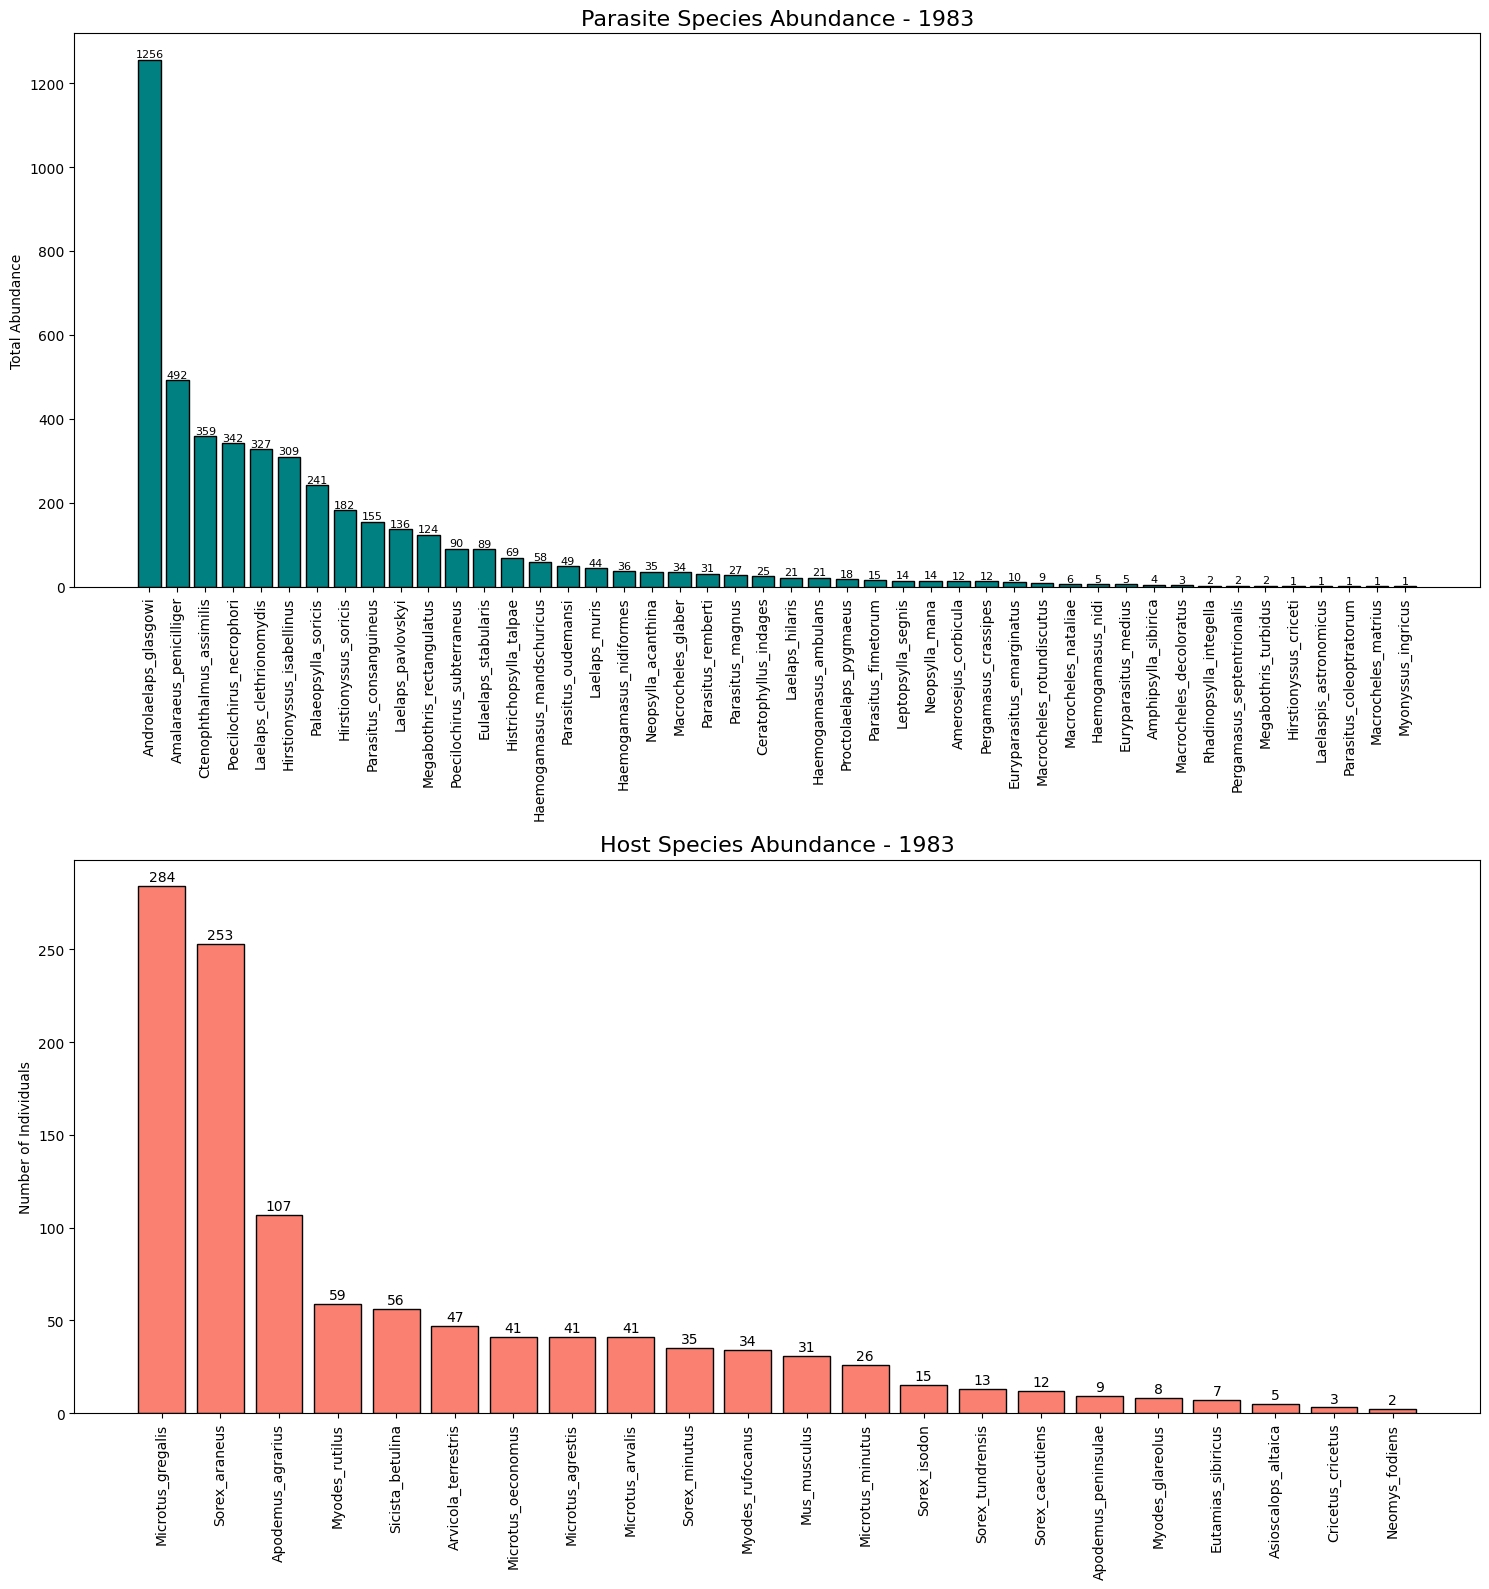

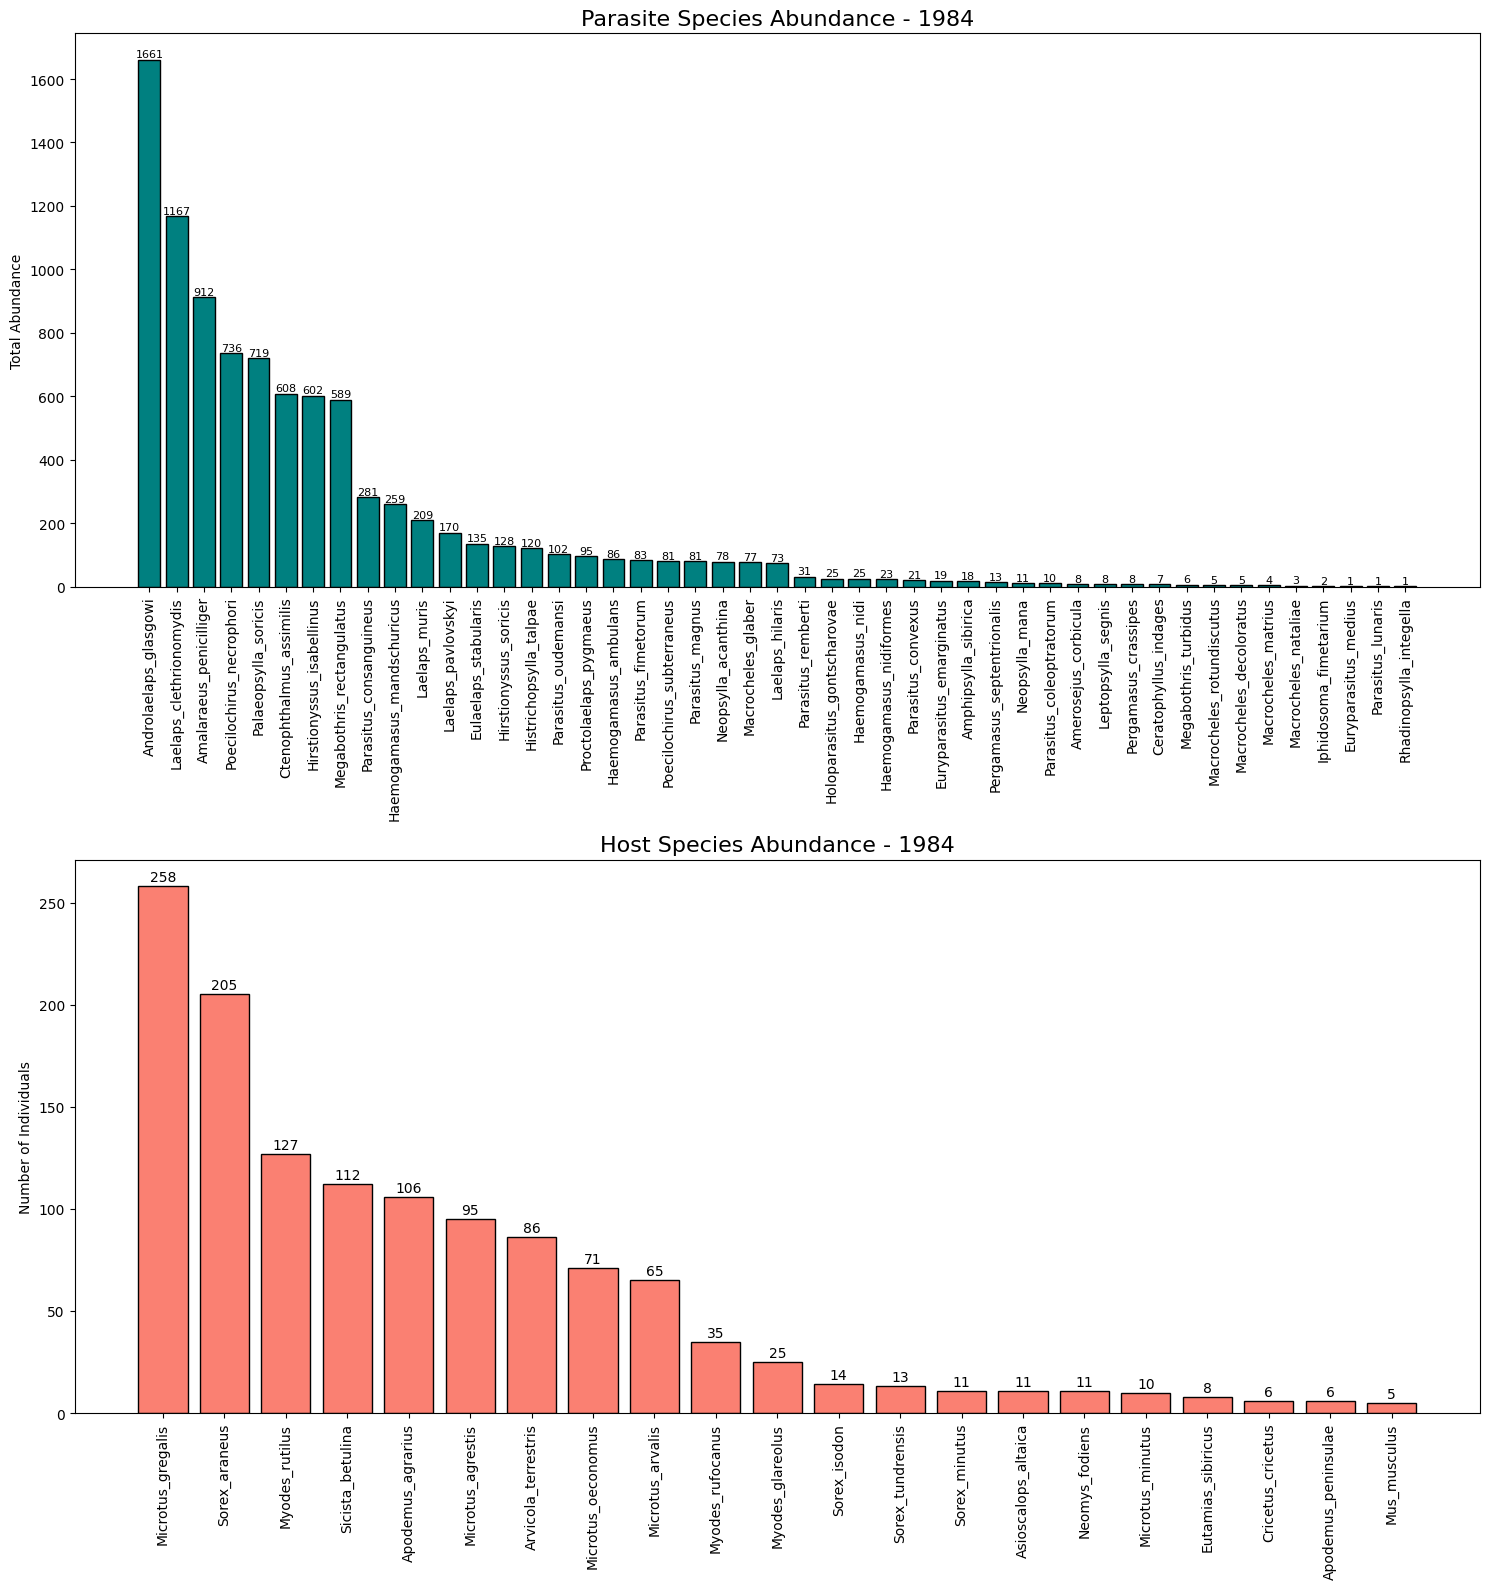

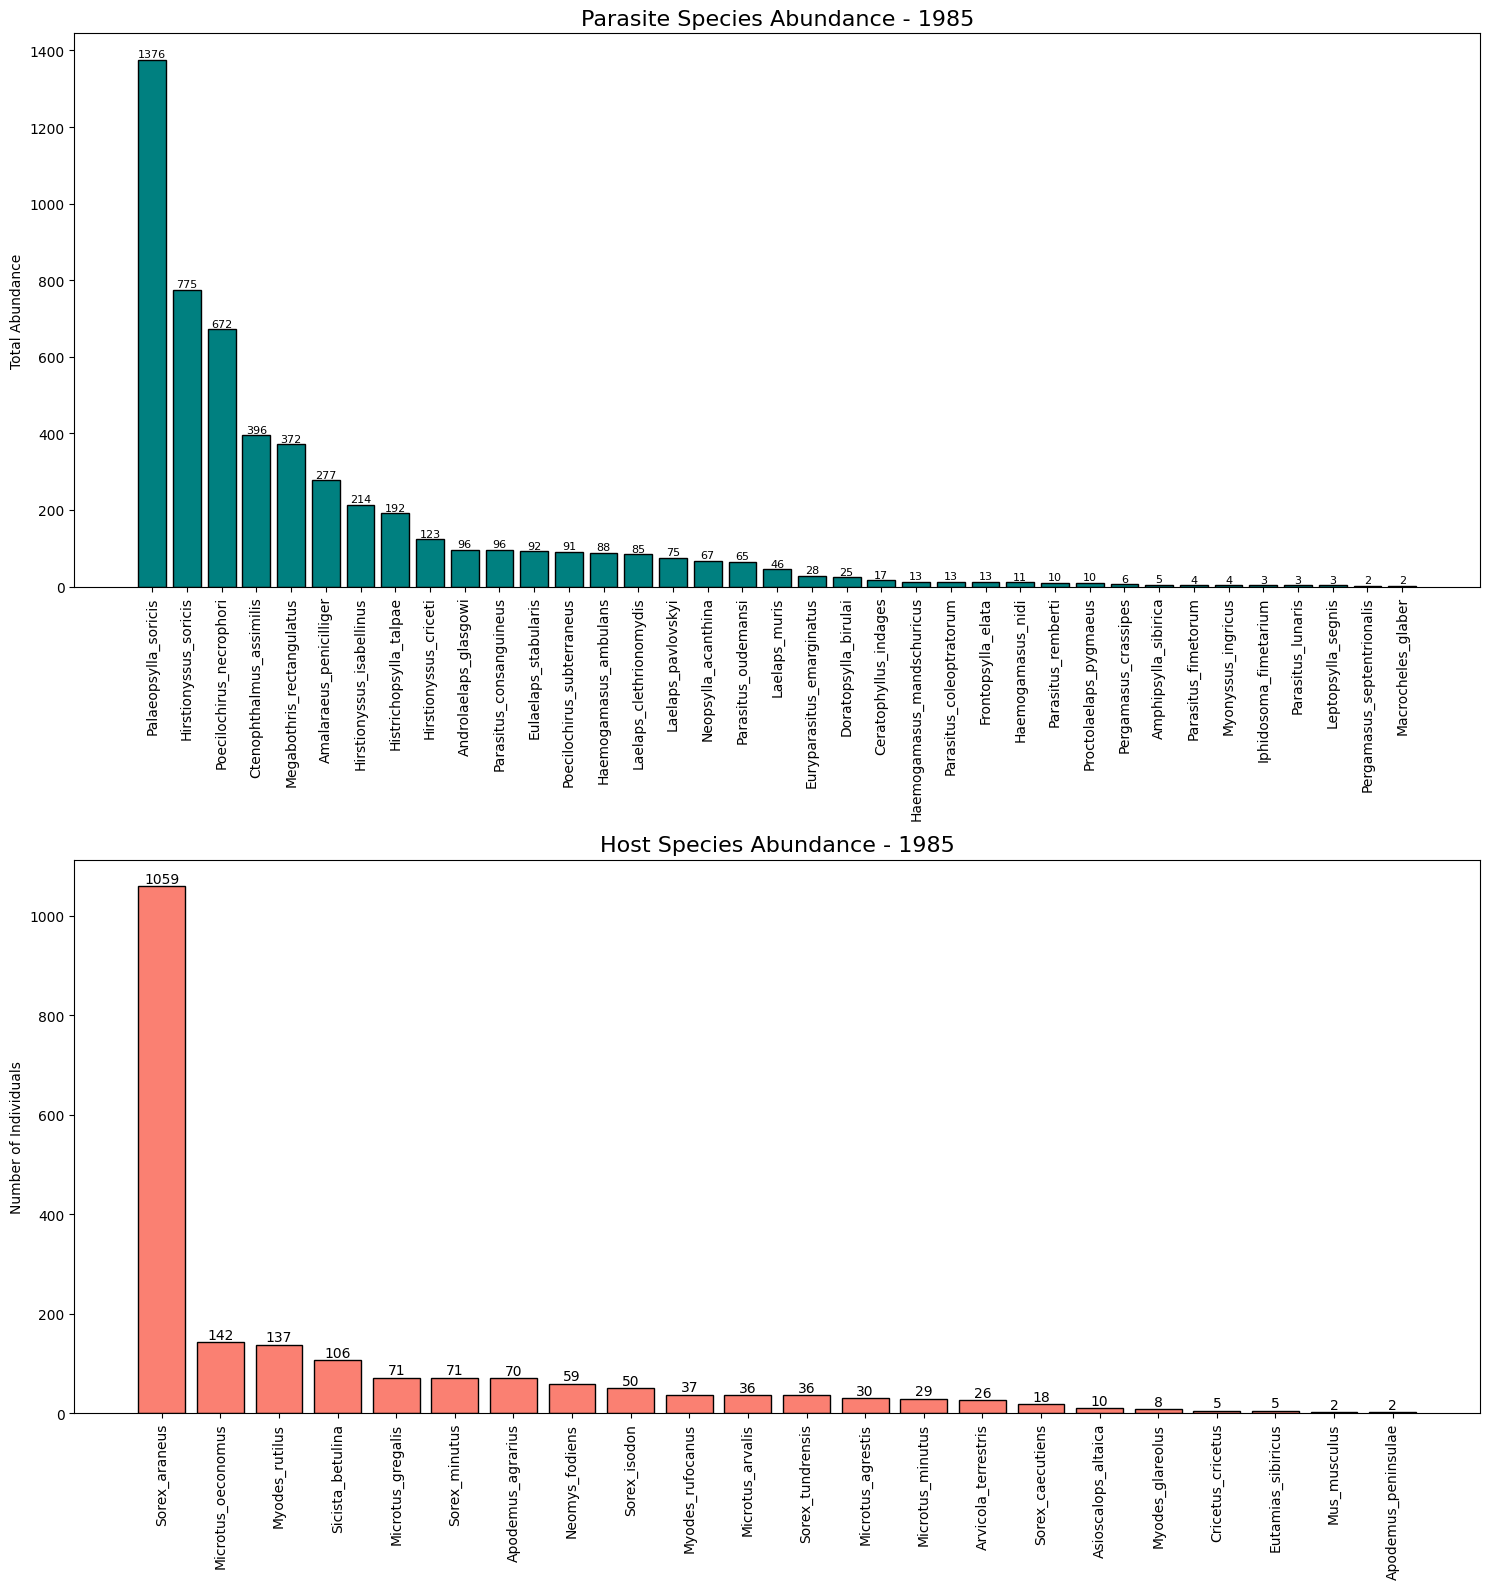

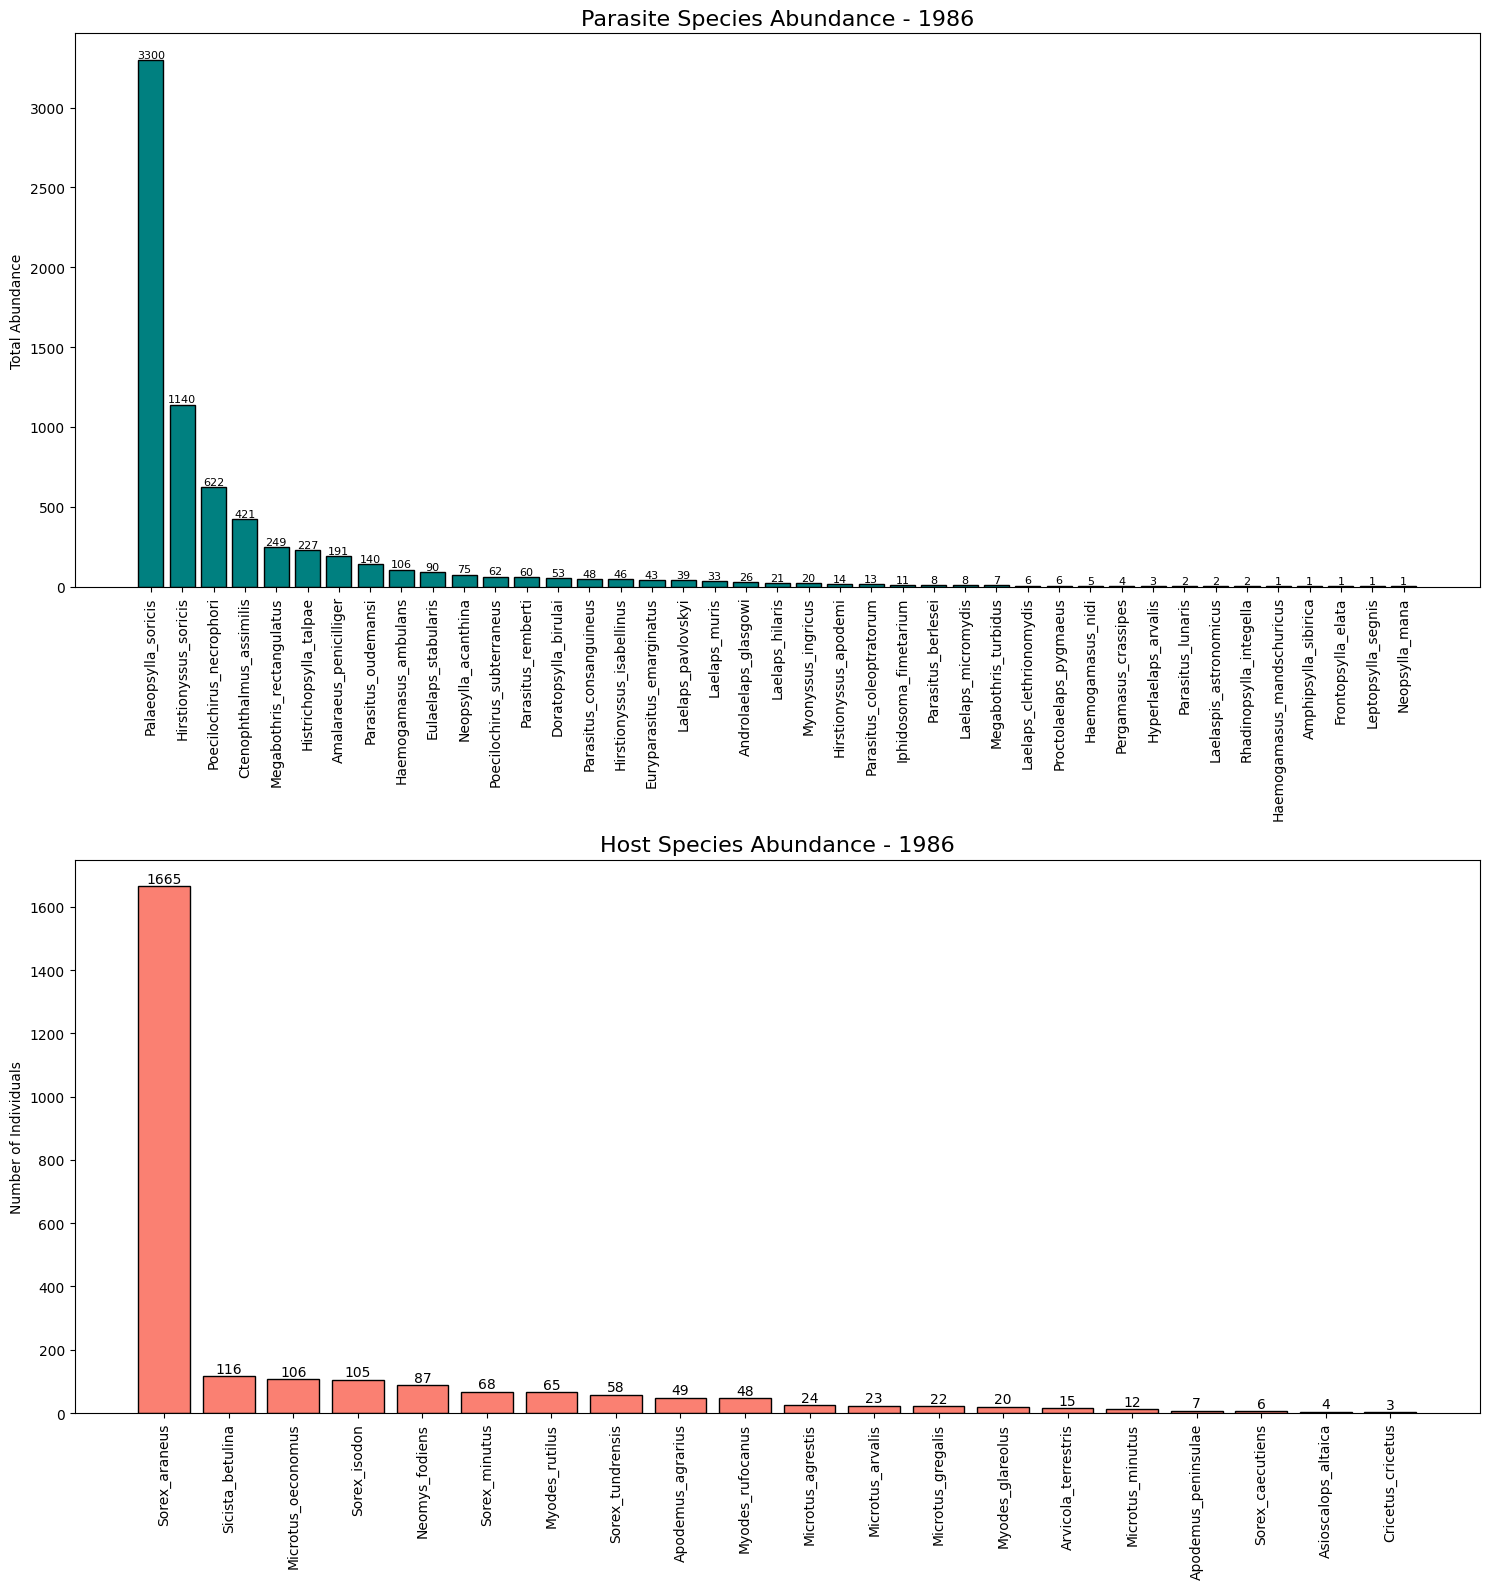

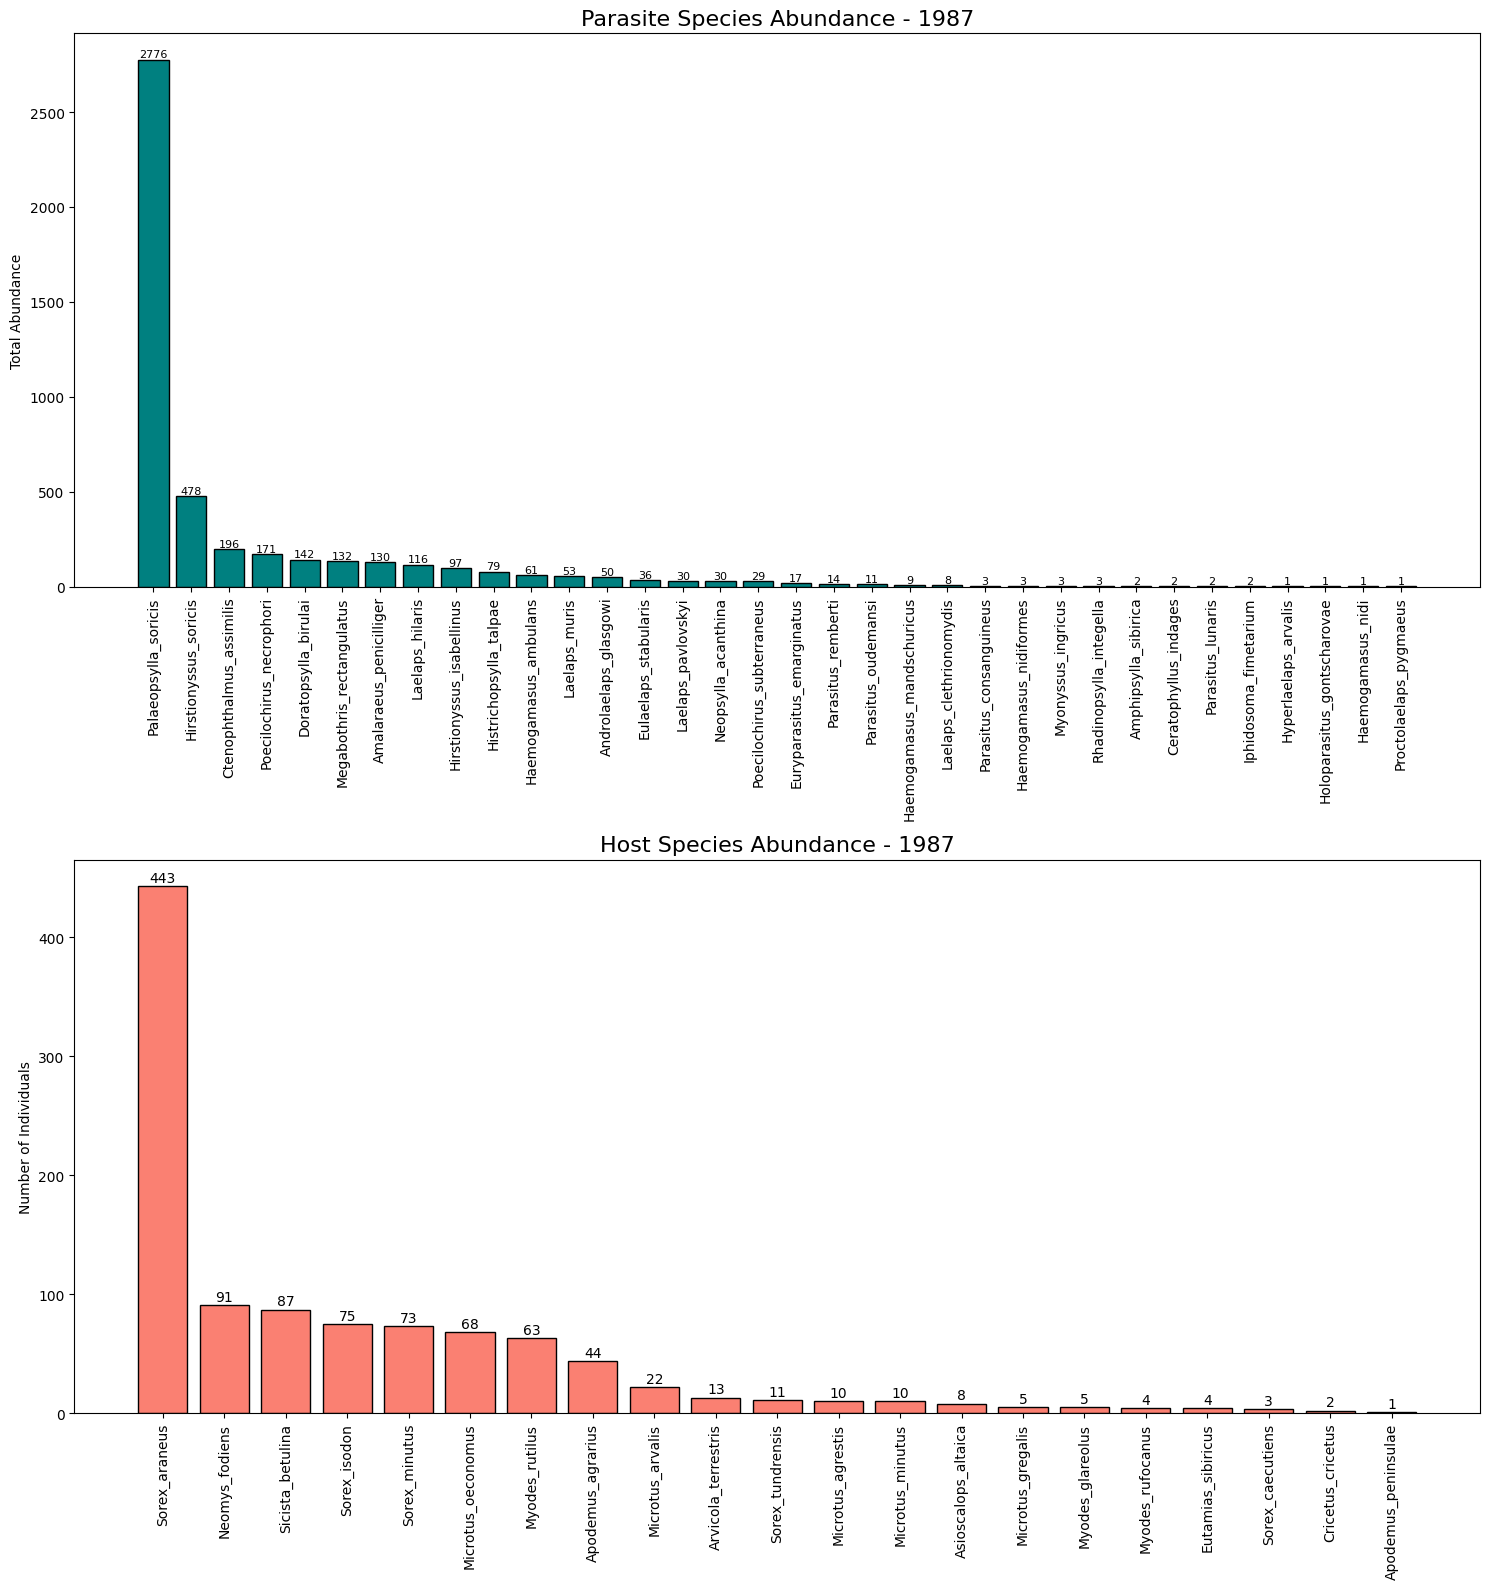

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Get unique years and define parasite columns
years = sorted(df['YearCollected'].unique())
parasite_cols = df.columns[2:]

# 3. Loop through each year to generate plots
for year in years:
    df_year = df[df['YearCollected'] == year]

    # Calculate Parasite Abundance (only species with count > 0)
    parasite_abundance = df_year[parasite_cols].sum().reset_index()
    parasite_abundance.columns = ['Species', 'Abundance']
    parasite_abundance = parasite_abundance[parasite_abundance['Abundance'] > 0].sort_values(by='Abundance', ascending=False)

    # Calculate Host Abundance
    host_abundance = df_year['Host'].value_counts().reset_index()
    host_abundance.columns = ['Host', 'Abundance']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 16))

    # --- Plot Parasite Abundance ---
    bars1 = ax1.bar(parasite_abundance['Species'], parasite_abundance['Abundance'], color='teal', edgecolor='black')
    ax1.set_title(f'Parasite Species Abundance - {year}', fontsize=16)
    ax1.set_ylabel('Total Abundance')
    ax1.tick_params(axis='x', rotation=90)
    # Add data labels
    for bar in bars1:
        yval = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=8)

    # --- Plot Host Abundance ---
    bars2 = ax2.bar(host_abundance['Host'], host_abundance['Abundance'], color='salmon', edgecolor='black')
    ax2.set_title(f'Host Species Abundance - {year}', fontsize=16)
    ax2.set_ylabel('Number of Individuals')
    ax2.tick_params(axis='x', rotation=90)
    # Add data labels
    for bar in bars2:
        yval = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    # Save each figure with the year in the filename
    plt.savefig(f'abundance_summary_{year}.png')
    plt.show()

In [7]:
import pandas as pd

# Load the data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

years = sorted(df['YearCollected'].unique())
parasite_cols = df.columns[2:]

results = []

for year in years:
    df_year = df[df['YearCollected'] == year]

    # Calculate Top 5 Hosts
    host_abundance = df_year['Host'].value_counts().head(5).reset_index()
    host_abundance.columns = ['Host', 'Abundance']
    host_list = [f"{row['Host']} ({int(row['Abundance'])})" for _, row in host_abundance.iterrows()]

    # Calculate Top 5 Parasites
    parasite_sum = df_year[parasite_cols].sum().sort_values(ascending=False).head(5).reset_index()
    parasite_sum.columns = ['Parasite', 'Abundance']
    parasite_list = [f"{row['Parasite']} ({int(row['Abundance'])})" for _, row in parasite_sum.iterrows()]

    results.append({
        'Year': year,
        'Top 5 Hosts': ", ".join(host_list),
        'Top 5 Parasites': ", ".join(parasite_list)
    })

# Display the summary table
top_5_summary = pd.DataFrame(results)
print(top_5_summary)

   Year                                        Top 5 Hosts  \
0  1982  Sorex_araneus (270), Microtus_gregalis (234), ...   
1  1983  Microtus_gregalis (284), Sorex_araneus (253), ...   
2  1984  Microtus_gregalis (258), Sorex_araneus (205), ...   
3  1985  Sorex_araneus (1059), Microtus_oeconomus (142)...   
4  1986  Sorex_araneus (1665), Sicista_betulina (116), ...   
5  1987  Sorex_araneus (443), Neomys_fodiens (91), Sici...   

                                     Top 5 Parasites  
0  Androlaelaps_glasgowi (968), Palaeopsylla_sori...  
1  Androlaelaps_glasgowi (1256), Amalaraeus_penic...  
2  Androlaelaps_glasgowi (1661), Laelaps_clethrio...  
3  Palaeopsylla_soricis (1376), Hirstionyssus_sor...  
4  Palaeopsylla_soricis (3300), Hirstionyssus_sor...  
5  Palaeopsylla_soricis (2776), Hirstionyssus_sor...  


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Now just typing the variable name will show an interactive table
top_5_summary

Year                                        Top 5 Hosts  \
0  1982  Sorex_araneus (270), Microtus_gregalis (234), ...   
1  1983  Microtus_gregalis (284), Sorex_araneus (253), ...   
2  1984  Microtus_gregalis (258), Sorex_araneus (205), ...   
3  1985  Sorex_araneus (1059), Microtus_oeconomus (142)...   
4  1986  Sorex_araneus (1665), Sicista_betulina (116), ...   
5  1987  Sorex_araneus (443), Neomys_fodiens (91), Sici...   

                                     Top 5 Parasites  
0  Androlaelaps_glasgowi (968), Palaeopsylla_sori...  
1  Androlaelaps_glasgowi (1256), Amalaraeus_penic...  
2  Androlaelaps_glasgowi (1661), Laelaps_clethrio...  
3  Palaeopsylla_soricis (1376), Hirstionyssus_sor...  
4  Palaeopsylla_soricis (3300), Hirstionyssus_sor...  
5  Palaeopsylla_soricis (2776), Hirstionyssus_sor...

# Plotting the degree distribution

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Identify parasite species columns (from index 2 onwards)
parasite_cols = df.columns[2:]

# 3. Calculate the degree for each individual host (row-wise)
# Degree = number of unique parasite species found on that specific host individual
df['Individual_Degree'] = (df[parasite_cols] > 0).sum(axis=1)

# 4. Set the visual style
sns.set_theme(style="whitegrid")

# 5. Create the Facet Plot
# Each facet represents a year; x-axis is the degree, y-axis is the count of host individuals
g = sns.catplot(
    data=df,
    x='Individual_Degree',
    col='YearCollected',
    kind='count',
    col_wrap=3,
    height=4,
    aspect=1.2,
    color='skyblue',
    edgecolor='black'
)

# 6. Customize titles and labels
g.set_axis_labels("Individual Degree (Parasite Species per Host)", "Number of Host Individuals")
g.set_titles("Year: {col_name}")

# Adjust layout and add a main title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Host Individual Degree Distribution per Year", fontsize=16)

# 7. Add numerical labels on top of each bar
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, padding=3, fontsize=8)

# Save and Show
plt.savefig('host_individual_degree_facet.png')
plt.show()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Binary Distribution

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


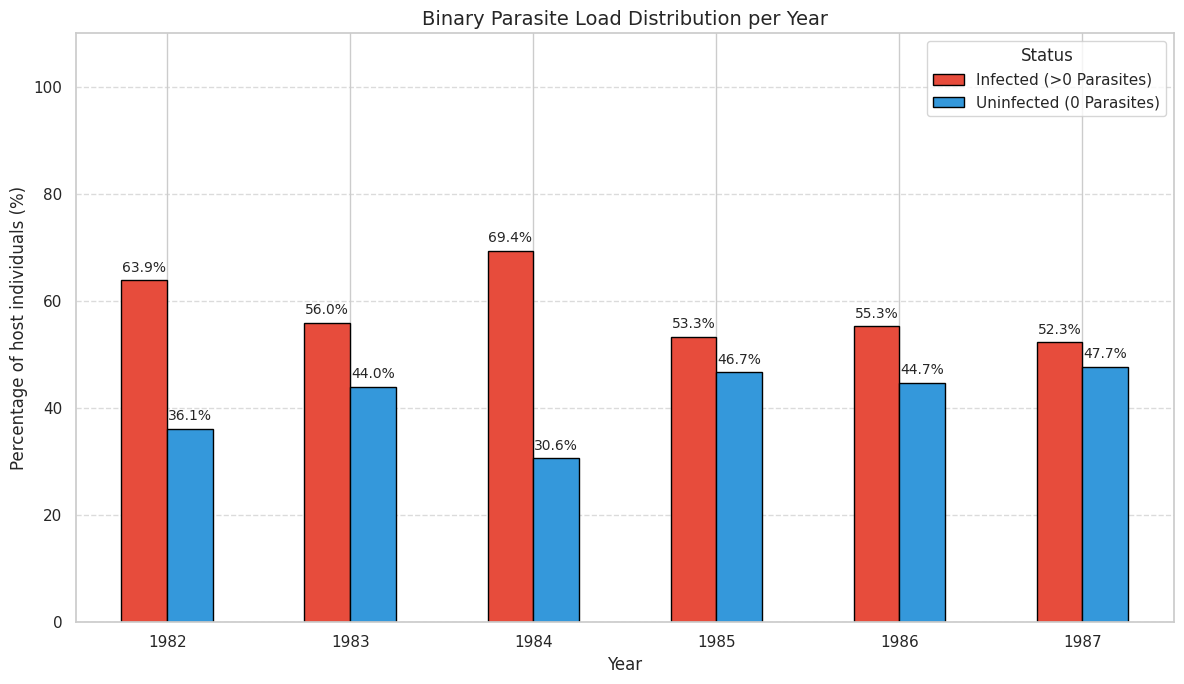

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Identify parasite columns
parasite_cols = df.columns[2:]

# 3. Calculate binary status for each individual host
# Infected = True if the sum of all parasites is > 0
df['Is_Infected'] = df[parasite_cols].sum(axis=1) > 0
df['Status'] = df['Is_Infected'].map({True: 'Infected', False: 'Uninfected'})

# 4. Calculate percentages for each year
binary_dist = df.groupby(['YearCollected', 'Status']).size().unstack(fill_value=0)
binary_dist_pct = binary_dist.div(binary_dist.sum(axis=1), axis=0) * 100

# 5. Plotting (Single Plot, Not Facetted)
ax = binary_dist_pct.plot(kind='bar', figsize=(12, 7), color=['#e74c3c', '#3498db'], edgecolor='black')

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points',
                fontsize=10)

plt.title('Binary Parasite Load Distribution per Year', fontsize=14)
plt.ylabel('Percentage of host individuals (%)', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status', labels=['Infected (>0 Parasites)', 'Uninfected (0 Parasites)'])
plt.ylim(0, 110)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig('binary_distribution_per_year.png')
plt.show()

# Proportional Parasite Load by Host Species

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


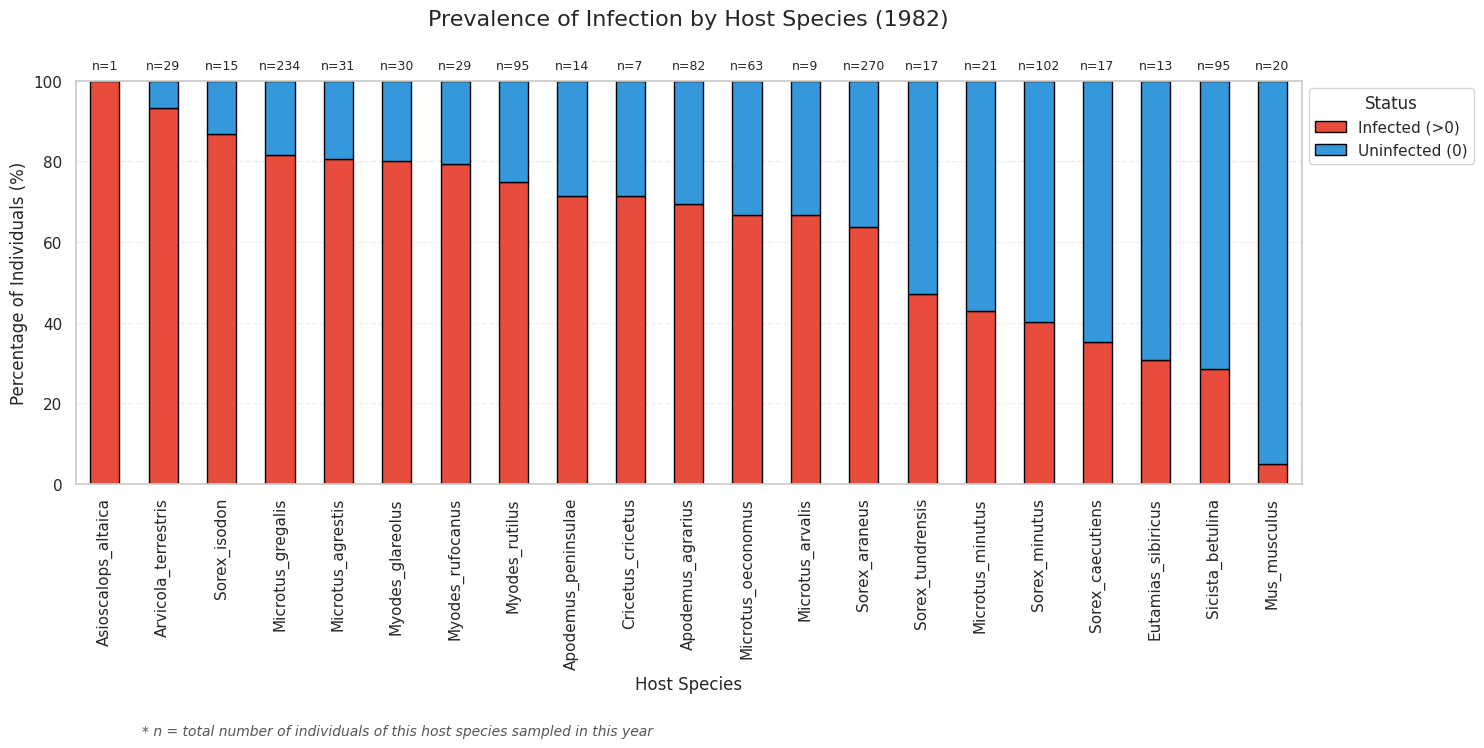

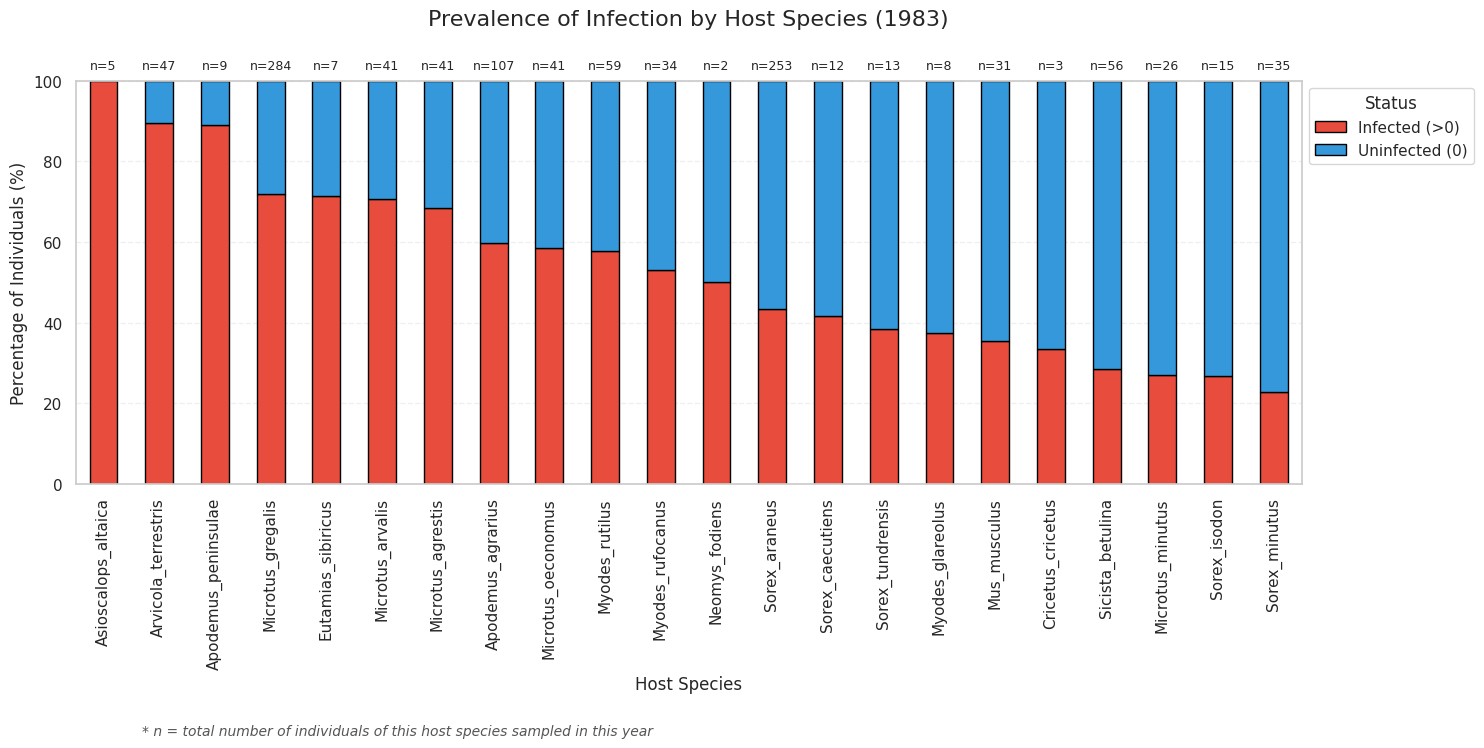

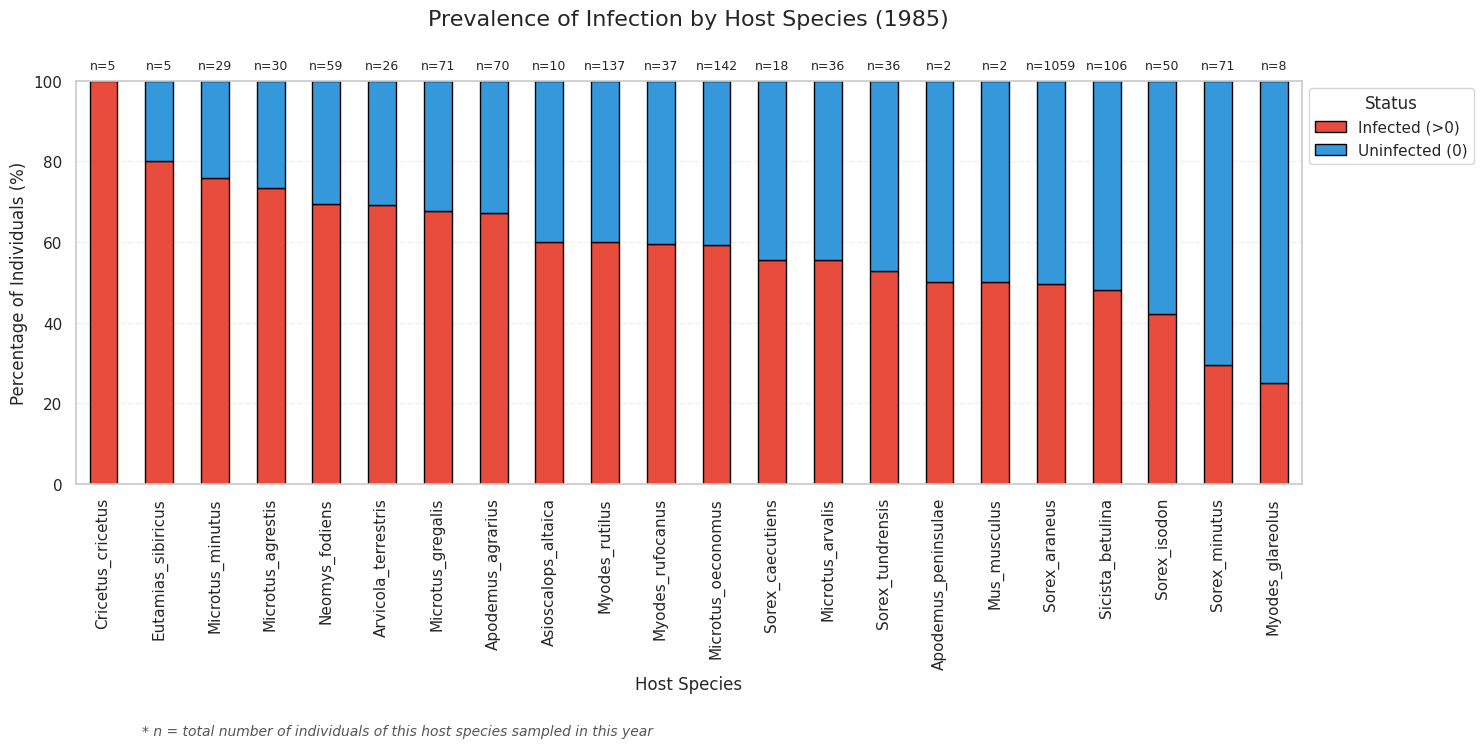

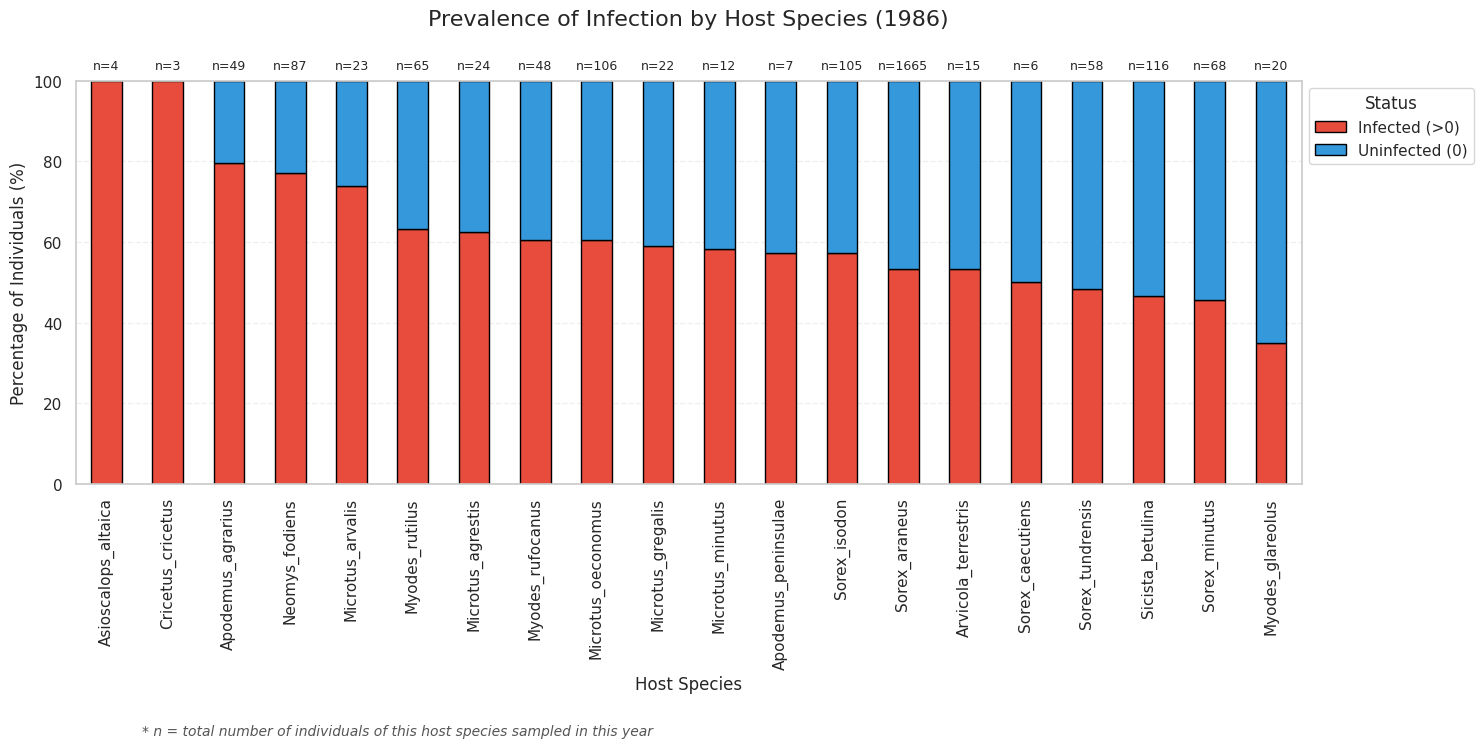

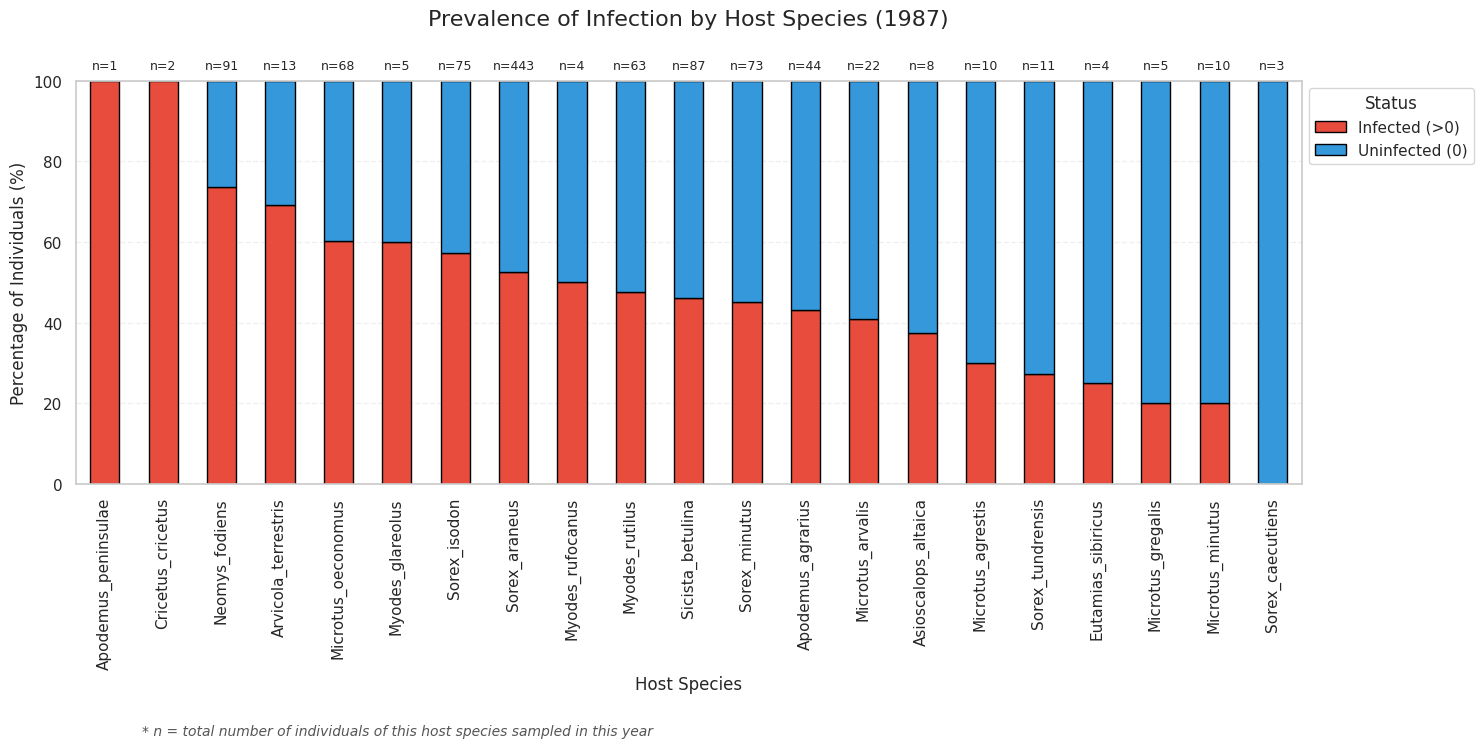

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Setup columns and status
parasite_cols = df.columns[2:]
df['Status'] = (df[parasite_cols].sum(axis=1) > 0).map({True: 'Infected', False: 'Uninfected'})
years = sorted(df['YearCollected'].unique())

# 3. Generate one plot for each year
for year in years:
    df_year = df[df['YearCollected'] == year]

    # Calculate counts and percentages
    cross_tab = pd.crosstab(df_year['Host'], df_year['Status'])
    cross_tab_pct = cross_tab.div(cross_tab.sum(1), axis=0) * 100
    cross_tab_pct = cross_tab_pct.sort_values(by='Infected', ascending=False)

    # 4. Create the plot
    fig, ax = plt.subplots(figsize=(15, 8))
    cross_tab_pct.plot(kind='bar', stacked=True, ax=ax,
                       color=['#e74c3c', '#3498db'], edgecolor='black')

    # Titles and Labels
    # Increased 'pad' to move title away from the bar labels
    plt.title(f'Prevalence of Infection by Host Species ({year})', fontsize=16, pad=40)
    plt.ylabel('Percentage of Individuals (%)', fontsize=12)
    plt.xlabel('Host Species', fontsize=12)
    plt.legend(title='Status', labels=['Infected (>0)', 'Uninfected (0)'],
               loc='upper left', bbox_to_anchor=(1, 1))

    plt.ylim(0, 100)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # 5. Add n labels (Total sample size per species)
    sample_sizes = cross_tab.sum(axis=1)
    for i, host in enumerate(cross_tab_pct.index):
        total = sample_sizes[host]
        # Place text slightly above the 100% mark
        ax.text(i, 102, f'n={int(total)}', ha='center', va='bottom', fontsize=9)

    # 6. Add footer explanation for 'n'
    fig.text(0.1, 0.02, '* n = total number of individuals of this host species sampled in this year',
             ha='left', fontsize=10, style='italic', color='#555555')

    # Adjust layout to prevent clipping
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])

    plt.savefig(f'prevalence_host_{year}.png')
    plt.show()

# showing for each year top 3 host species that have the most individuals with 0 parasite load

In [12]:
import pandas as pd

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Identify parasite columns and find uninfected individuals
parasite_cols = df.columns[2:]
df['Is_Uninfected'] = df[parasite_cols].sum(axis=1) == 0

# 3. Group and find top 3 per year
uninfected_counts = df[df['Is_Uninfected']].groupby(['YearCollected', 'Host']).size().reset_index(name='Count')
top_3_per_year = uninfected_counts.sort_values(['YearCollected', 'Count'], ascending=[True, False]).groupby('YearCollected').head(3)

print(top_3_per_year)

# 4. Group and find overall top 3
overall_top_3 = df[df['Is_Uninfected']].groupby('Host').size().sort_values(ascending=False).head(3)
print("\nOverall Top 3:")
print(overall_top_3)

     YearCollected                Host  Count
15            1982       Sorex_araneus     98
14            1982    Sicista_betulina     68
18            1982       Sorex_minutus     61
36            1983       Sorex_araneus    143
27            1983   Microtus_gregalis     80
20            1983   Apodemus_agrarius     43
58            1984       Sorex_araneus     72
57            1984    Sicista_betulina     64
55            1984      Myodes_rutilus     47
78            1985       Sorex_araneus    535
71            1985  Microtus_oeconomus     58
75            1985      Myodes_rutilus     55
96            1986       Sorex_araneus    776
95            1986    Sicista_betulina     62
98            1986        Sorex_isodon     45
115           1987       Sorex_araneus    210
114           1987    Sicista_betulina     47
118           1987       Sorex_minutus     40

Overall Top 3:
Host
Sorex_araneus       1834
Sicista_betulina     336
Sorex_minutus        221
dtype: int64


/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# for the year 1984 what is the precentege of mites and fleas

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/tmp/ipython-input-497584608.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  host_summary = df_1984.groupby('Host').apply(lambda x: pd.Series({


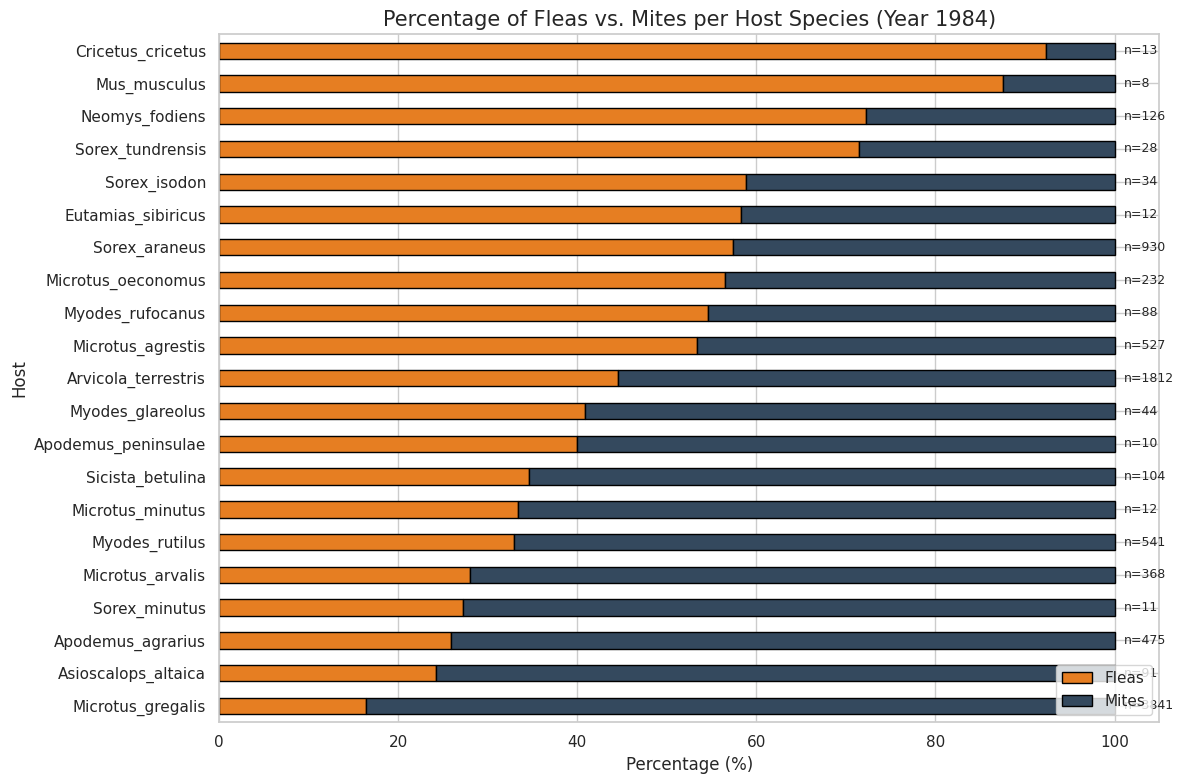

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Filter for 1984 and define groups
df_1984 = df[df['YearCollected'] == 1984]

flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]

parasite_cols = df.columns[2:]
flea_cols = [c for c in parasite_cols if c.split('_')[0] in flea_genera]
mite_cols = [c for c in parasite_cols if c.split('_')[0] not in flea_genera]

# 3. Aggregate abundance
host_summary = df_1984.groupby('Host').apply(lambda x: pd.Series({
    'Total_Fleas': x[flea_cols].values.sum(),
    'Total_Mites': x[mite_cols].values.sum()
})).reset_index()

host_summary['Grand_Total'] = host_summary['Total_Fleas'] + host_summary['Total_Mites']
host_summary = host_summary[host_summary['Grand_Total'] > 0] # Filter out hosts with no parasites

# 4. Calculate Percentages
host_summary['Flea_Percentage'] = (host_summary['Total_Fleas'] / host_summary['Grand_Total']) * 100
host_summary['Mite_Percentage'] = (host_summary['Total_Mites'] / host_summary['Grand_Total']) * 100
host_summary = host_summary.sort_values('Flea_Percentage')

# 5. Plotting
ax = host_summary.set_index('Host')[['Flea_Percentage', 'Mite_Percentage']].plot(
    kind='barh', stacked=True, figsize=(12, 8), color=['#e67e22', '#34495e'], edgecolor='black'
)

plt.title('Percentage of Fleas vs. Mites per Host Species (Year 1984)', fontsize=15)
plt.xlabel('Percentage (%)')
plt.legend(['Fleas', 'Mites'], loc='lower right')

# Add n= labels
for i, total in enumerate(host_summary['Grand_Total']):
    ax.text(101, i, f'n={int(total)}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


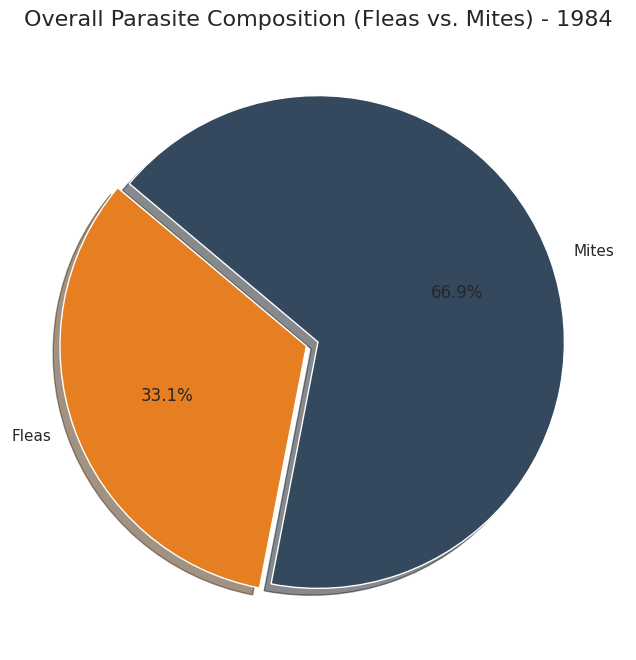

Total Fleas: 3077
Total Mites: 6230


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Filter for 1984
df_1984 = df[df['YearCollected'] == 1984]

# 3. Categorize
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]
parasite_cols = df.columns[2:]
flea_cols = [c for c in parasite_cols if c.split('_')[0] in flea_genera]
mite_cols = [c for c in parasite_cols if c.split('_')[0] not in flea_genera]

# 4. Calculate overall totals
total_fleas = df_1984[flea_cols].values.sum()
total_mites = df_1984[mite_cols].values.sum()
grand_total = total_fleas + total_mites

# 5. Plotting a Pie Chart
plt.figure(figsize=(8, 8))
plt.pie([total_fleas, total_mites],
        labels=['Fleas', 'Mites'],
        autopct='%1.1f%%',
        colors=['#e67e22', '#34495e'],
        startangle=140,
        explode=(0.05, 0),
        shadow=True)

plt.title('Overall Parasite Composition (Fleas vs. Mites) - 1984', fontsize=16)
plt.savefig('overall_parasite_pie_1984.png')
plt.show()

print(f"Total Fleas: {total_fleas}")
print(f"Total Mites: {total_mites}")

# aggregating to species level using prevalence

/usr/local/lib/python3.12/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/tmp/ipython-input-2641966780.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prevalence_agg = df.groupby(['YearCollected', 'Host']).apply(calculate_prevalence).reset_index()


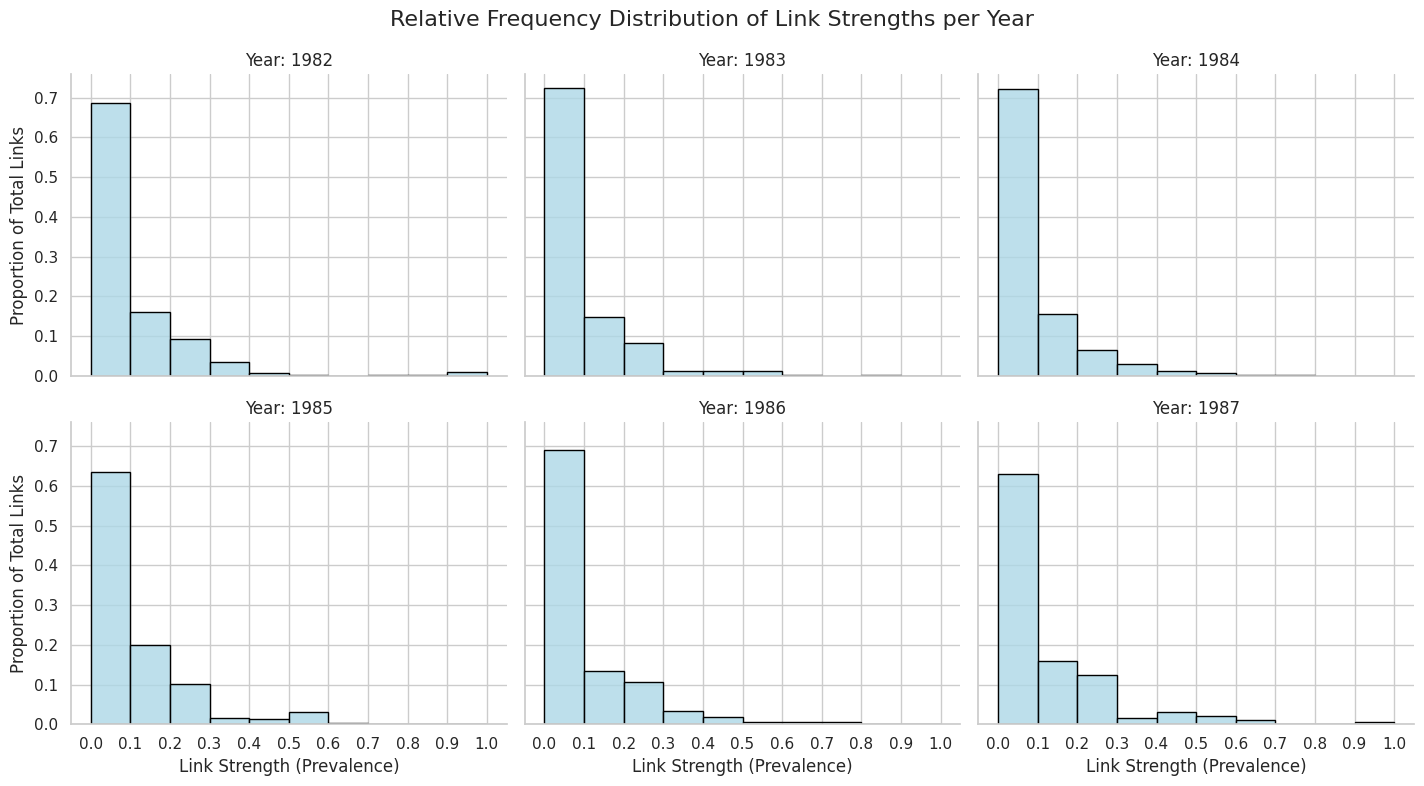

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load data
path = "/content/drive/MyDrive/DATA.xlsx"
df = pd.read_excel(path)

# 2. Calculate Prevalence per (Year, Host, Parasite)
parasite_cols = df.columns[2:]

def calculate_prevalence(group):
    n_hosts = len(group)
    return (group[parasite_cols] > 0).sum() / n_hosts

prevalence_agg = df.groupby(['YearCollected', 'Host']).apply(calculate_prevalence).reset_index()

# 3. Filter for active links (Prevalence > 0)
links_df = prevalence_agg.melt(
    id_vars=['YearCollected', 'Host'],
    value_vars=parasite_cols,
    var_name='Parasite',
    value_name='Prevalence'
)
active_links = links_df[links_df['Prevalence'] > 0].copy()

# 4. Plotting the Relative Frequency
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(active_links, col="YearCollected", col_wrap=3, height=4, aspect=1.2, sharey=True)

# Define bins (0 to 1 in 0.1 steps)
bins = np.linspace(0, 1, 11)

# Use stat="proportion" to show the fraction of total links in each bin
g.map_dataframe(
    sns.histplot,
    x="Prevalence",
    bins=bins,
    stat="proportion",
    color="lightblue",
    edgecolor="black",
    alpha=0.8
)

# Formatting
g.set_axis_labels("Link Strength (Prevalence)", "Proportion of Total Links")
g.set_titles("Year: {col_name}")

# Standardize X-axis ticks
for ax in g.axes.flat:
    ax.set_xticks(bins)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relative Frequency Distribution of Link Strengths per Year", fontsize=16)

plt.savefig('prevalence_proportion_distribution.png')
plt.show()

# looking at the prevalence data frame for 1984

In [16]:
#filtering the data so it will bw only to 1984
df_1984 = df[df['YearCollected'] == 1984]
# 2. Convert counts to Binary at the INDIVIDUAL level
# If count > 0, it becomes 1 (infected). If 0, it stays 0 (not infected).
df_1984_binary = df_1984.copy()
df_1984_binary[parasite_cols] = (df_1984[parasite_cols] > 0).astype(int)

# 3. Calculate the Proportion (Prevalence) per Host Species
# The mean of 1s and 0s gives the proportion (e.g., 0.50 = 50% infected)
wide_1984 = df_1984_binary.groupby('Host')[parasite_cols].mean()

# 1. Melt the wide 1984 matrix into a long list of potential interactions
# We name it 'model_df' to match the rest of our machine learning code
model_df = wide_1984.reset_index().melt(id_vars='Host', var_name='Parasite', value_name='Prevalence')

# 2. Define the binary target (1 = Link exists, 0 = No link)
model_df['Is_Present'] = (model_df['Prevalence'] > 0).astype(int)

# 3. Calculate the Network Degrees (The Features)
host_deg = model_df.groupby('Host')['Is_Present'].sum().reset_index(name='Host_Degree')
para_deg = model_df.groupby('Parasite')['Is_Present'].sum().reset_index(name='Parasite_Degree')

# 4. Merge them back together
model_df = model_df.merge(host_deg, on='Host').merge(para_deg, on='Parasite')

# 5. Create the Interaction term
model_df['Interaction'] = model_df['Host_Degree'] * model_df['Parasite_Degree']

# 6. Set up X and y for the model
features = ['Host_Degree', 'Parasite_Degree', 'Interaction']
X = model_df[features]
y = model_df['Is_Present']

print("Step 1 Complete: 'model_df' created and features X, y are defined.")

Step 1 Complete: 'model_df' created and features X, y are defined.


In [17]:
wide_1984 #looking at the prevalence data frame

Androlaelaps_glasgowi  Amerosejus_corbicula  \
Host                                                               
Apodemus_agrarius                 0.084906              0.000000   
Apodemus_peninsulae               0.000000              0.000000   
Arvicola_terrestris               0.267442              0.011628   
Asioscalops_altaica               0.000000              0.000000   
Cricetus_cricetus                 0.166667              0.000000   
Eutamias_sibiricus                0.125000              0.000000   
Microtus_agrestis                 0.126316              0.000000   
Microtus_arvalis                  0.246154              0.000000   
Microtus_gregalis                 0.577519              0.007752   
Microtus_minutus                  0.000000              0.000000   
Microtus_oeconomus                0.098592              0.000000   
Mus_musculus                      0.000000              0.000000   
Myodes_glareolus                  0.080000              0.000000   
Myodes_rufocanus                  0.085714              0.000000   
Myodes_rutilus                    0.047244              0.007874   
Neomys_fodiens                    0.000000              0.000000   
Sicista_betulina                  0.035714              0.000000   
Sorex_araneus                     0.058537              0.000000   
Sorex_isodon                      0.000000              0.000000   
Sorex_minutus                     0.000000              0.000000   
Sorex_tundrensis                  0.000000              0.000000   

                     Euryparasitus_emarginatus  Euryparasitus_medius  \
Host                                                                   
Apodemus_agrarius                     0.000000              0.000000   
Apodemus_peninsulae                   0.000000              0.000000   
Arvicola_terrestris                   0.011628              0.011628   
Asioscalops_altaica                   0.272727              0.000000   
Cricetus_cricetus                     0.000000              0.000000   
Eutamias_sibiricus                    0.000000              0.000000   
Microtus_agrestis                     0.000000              0.000000   
Microtus_arvalis                      0.015385              0.000000   
Microtus_gregalis                     0.007752              0.000000   
Microtus_minutus                      0.000000              0.000000   
Microtus_oeconomus                    0.014085              0.000000   
Mus_musculus                          0.000000              0.000000   
Myodes_glareolus                      0.000000              0.000000   
Myodes_rufocanus                      0.000000              0.000000   
Myodes_rutilus                        0.000000              0.000000   
Neomys_fodiens                        0.181818              0.000000   
Sicista_betulina                      0.000000              0.000000   
Sorex_araneus                         0.009756              0.000000   
Sorex_isodon                          0.000000              0.000000   
Sorex_minutus                         0.000000              0.000000   
Sorex_tundrensis                      0.153846              0.000000   

                     Eulaelaps_stabularis  Haemogamasus_ambulans  \
Host                                                               
Apodemus_agrarius                0.066038               0.009434   
Apodemus_peninsulae              0.000000               0.166667   
Arvicola_terrestris              0.151163               0.069767   
Asioscalops_altaica              0.000000               0.000000   
Cricetus_cricetus                0.000000               0.000000   
Eutamias_sibiricus               0.000000               0.000000   
Microtus_agrestis                0.094737               0.136842   
Microtus_arvalis                 0.076923               0.015385   
Microtus_gregalis                0.108527               0.023256   
Microtus_minutus                 0.000000          

In [18]:
model_df #looking at the model_df matrix

Host                 Parasite  Prevalence  Is_Present  \
0       Apodemus_agrarius    Androlaelaps_glasgowi    0.084906           1   
1     Apodemus_peninsulae    Androlaelaps_glasgowi    0.000000           0   
2     Arvicola_terrestris    Androlaelaps_glasgowi    0.267442           1   
3     Asioscalops_altaica    Androlaelaps_glasgowi    0.000000           0   
4       Cricetus_cricetus    Androlaelaps_glasgowi    0.166667           1   
...                   ...                      ...         ...         ...   
1171     Sicista_betulina  Rhadinopsylla_integella    0.000000           0   
1172        Sorex_araneus  Rhadinopsylla_integella    0.004878           1   
1173         Sorex_isodon  Rhadinopsylla_integella    0.000000           0   
1174        Sorex_minutus  Rhadinopsylla_integella    0.000000           0   
1175     Sorex_tundrensis  Rhadinopsylla_integella    0.000000           0   

      Host_Degree  Parasite_Degree  Interaction  
0              31               13          403  
1               7               13           91  
2              37               13          481  
3              14               13          182  
4               5               13           65  
...           ...              ...          ...  
1171           19                1           19  
1172           31                1           31  
1173           11                1           11  
1174            9                1            9  
1175            8                1            8  

[1176 rows x 7 columns]

plotting 0 count prevalence and positive prevalence for 1984

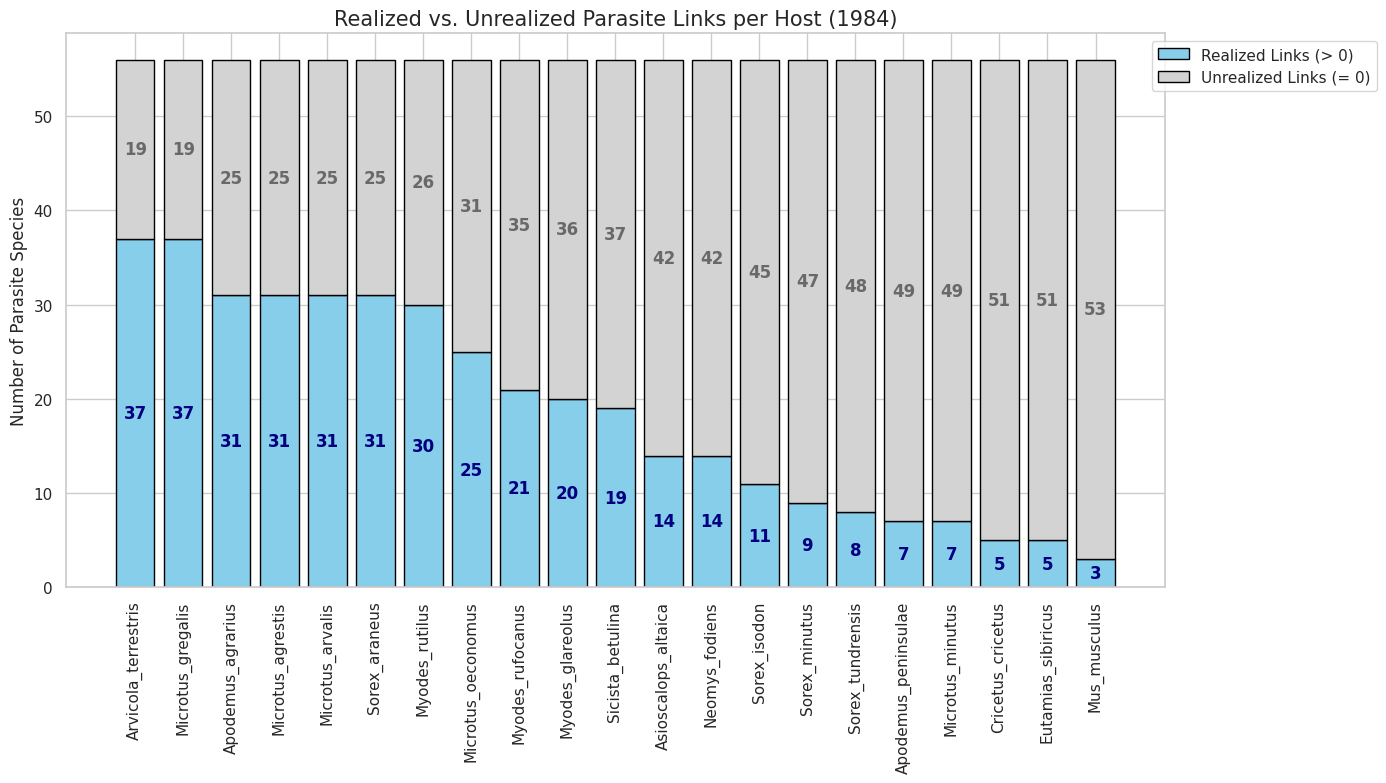

In [19]:
# 1. Calculate counts from your wide_1984 dataframe
positive_counts = (wide_1984 > 0).sum(axis=1)
zero_counts = (wide_1984 == 0).sum(axis=1)

# 2. Combine and sort by number of realized links
plot_df = pd.DataFrame({
    'Positive': positive_counts,
    'Zero': zero_counts
}).sort_values('Positive', ascending=False)

# 3. Plotting
plt.figure(figsize=(14, 8))

# Draw the bars
plt.bar(plot_df.index, plot_df['Positive'], color='skyblue', label='Realized Links (> 0)', edgecolor='black')
plt.bar(plot_df.index, plot_df['Zero'], bottom=plot_df['Positive'], color='lightgrey', label='Unrealized Links (= 0)', edgecolor='black')

# 4. Add text labels for BOTH sections
for i, (pos, zero) in enumerate(zip(plot_df['Positive'], plot_df['Zero'])):
    # Label inside the Positive (Blue) section
    if pos > 0:
        plt.text(i, pos/2, int(pos), ha='center', va='center', fontweight='bold', color='navy')

    # Label inside the Zero (Grey) section
    if zero > 0:
        plt.text(i, pos + (zero/2), int(zero), ha='center', va='center', fontweight='bold', color='dimgrey')

# Formatting
plt.xticks(rotation=90)
plt.ylabel('Number of Parasite Species')
plt.title('Realized vs. Unrealized Parasite Links per Host (1984)', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

#dividing the data into mites and fleas

In [20]:
# 1. Define the flea genera based on the taxonomy
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]

# 2. Identify all parasite columns (everything after the first two metadata columns)
parasite_cols = df.columns[2:]

# 3. Create lists of column names for each group
flea_cols = [c for c in parasite_cols if c.split('_')[0] in flea_genera]
mite_cols = [c for c in parasite_cols if c.split('_')[0] not in flea_genera]

# 4. Create the split DataFrames
# We keep 'YearCollected' and 'Host' in both so we can still group them later
df_fleas = df[['YearCollected', 'Host'] + flea_cols].copy()
df_mites = df[['YearCollected', 'Host'] + mite_cols].copy()



# building a pipeline for binary model that predicts 1/0 for host - parasite

In [29]:
import pandas as pd
import numpy as np


model_df = wide_1984.reset_index().melt(id_vars='Host', var_name='Parasite', value_name='Prevalence')

#Define our target: 1 if the link exists, 0 if not
model_df['Is_Present'] = (model_df['Prevalence'] > 0).astype(int)

#Calculate Network Features (Degrees)
# Host Degree: How many parasites does this host have
h_deg = model_df.groupby('Host')['Is_Present'].sum().reset_index(name='Host_Degree')

# Parasite Degree: How many hosts does this parasite infect?
p_deg = model_df.groupby('Parasite')['Is_Present'].sum().reset_index(name='Parasite_Degree')

#Merge these features back into our main table
model_df = model_df.merge(h_deg, on='Host').merge(p_deg, on='Parasite')

#Create the Synergy Term (Interaction = host degree * parasite degree )
model_df['Interaction'] = model_df['Host_Degree'] * model_df['Parasite_Degree']

# 6. Final definition of X (Predictors) and y (Target)
features = ['Host_Degree', 'Parasite_Degree', 'Interaction']
X = model_df[features]
y = model_df['Is_Present']

print(f"Step 1 Complete: Created {len(model_df)} potential links for analysis.")
print(f"Features: {features}")



from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_recall_curve, roc_auc_score
import numpy as np

# 1. Initialize our recording lists
outer_auc_scores = []
outer_f1_scores = []
best_thresholds = []
outer_pr_auc_scores = []

# 2. Define the Loops
# Outer Loop (n=5) tests the generalizability
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Inner Loop (n=3) tunes the hyperparameters
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 3. Define the Pipeline and Tuning Grid
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(class_weight='balanced', solver='liblinear')) #makes positive class cost higher because i have many zeros.
])#supports both l1 and l2 penalties.

param_grid = {
    'logistic__C': [0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2']
}
#Smaller C → stronger regularization → simpler model.
#l1= lasso, Penalizing absolute magnitude. "Only the strongest predictors survive."
#l2= Ridge, Penalizing large coefficients quadratically. it means Use everything, but gently.All predictors matter a bit, but none should dominate.

print("--- Starting Nested CV with Hyperparameter & Threshold Tuning ---")

for train_idx, test_idx in outer_cv.split(X, y):
    X_train_out, X_test_out = X.iloc[train_idx], X.iloc[test_idx]
    y_train_out, y_test_out = y.iloc[train_idx], y.iloc[test_idx]

    # A. Search for best C and Penalty
    grid = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='average_precision')
    grid.fit(X_train_out, y_train_out)

    # B. Find the best threshold for F1 on the training data
    y_train_probs = grid.predict_proba(X_train_out)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_train_out, y_train_probs)
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-10)
    best_t = thresholds[np.argmax(f1_scores)] #Picks threshold that maximizes F1 on training set
    best_thresholds.append(best_t)

    # C. Test on the unseen data using the tuned parameters and threshold
    y_test_probs = grid.predict_proba(X_test_out)[:, 1]
    y_test_preds = (y_test_probs >= best_t).astype(int)
    y_test_probs = grid.predict_proba(X_test_out)[:, 1]
    #Convert probabilities to predicted class using the tuned threshold.
    outer_auc_scores.append(roc_auc_score(y_test_out, y_test_probs))
    outer_f1_scores.append(f1_score(y_test_out, y_test_preds))
    outer_pr_auc_scores.append(average_precision_score(y_test_out, y_test_probs))
    print(f"Fold AUC: {outer_auc_scores[-1]:.3f} | Best Threshold: {best_t:.3f}")

# 4. Final Summary of Performance
print("\n--- FINAL SCIENTIFIC RESULTS ---")
print(f"Mean ROC-AUC (Reliability): {np.mean(outer_auc_scores):.4f}")
print(f"Mean F1-Score (Link Detection): {np.mean(outer_f1_scores):.4f}")
print(f"Mean PR AUC (Precision-Recall): {np.mean(outer_pr_auc_scores):.4f}")
avg_threshold = np.mean(best_thresholds)
print(f"Recommended Threshold for Step 3: {avg_threshold:.3f}")

Step 1 Complete: Created 1176 potential links for analysis.
Features: ['Host_Degree', 'Parasite_Degree', 'Interaction']
--- Starting Nested CV with Hyperparameter & Threshold Tuning ---
Fold AUC: 0.945 | Best Threshold: 0.538
Fold AUC: 0.955 | Best Threshold: 0.652
Fold AUC: 0.941 | Best Threshold: 0.666
Fold AUC: 0.958 | Best Threshold: 0.582
Fold AUC: 0.899 | Best Threshold: 0.677

--- FINAL SCIENTIFIC RESULTS ---
Mean ROC-AUC (Reliability): 0.9395
Mean F1-Score (Link Detection): 0.8053
Mean PR AUC (Precision-Recall): 0.9028
Recommended Threshold for Step 3: 0.623


final model after tuning

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Train the Final "Production" Model on ALL data
# We use the best parameters found during Step 2
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(class_weight='balanced',
                                   solver='liblinear',
                                   C=1.0, # Standard robust C
                                   penalty='l1'))
])

final_pipeline.fit(X, y)

# 2. Use your Recommended Threshold
final_threshold = 0.622

# 3. Generate Final Predictions
probs = final_pipeline.predict_proba(X)[:, 1]
preds = (probs >= final_threshold).astype(int)



# 5. Print the full scientific report
print("--- Final Model Performance Report ---")
print(classification_report(y, preds))

--- Final Model Performance Report ---
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       780
           1       0.82      0.79      0.81       396

    accuracy                           0.87      1176
   macro avg       0.86      0.85      0.86      1176
weighted avg       0.87      0.87      0.87      1176



# confusion matrix

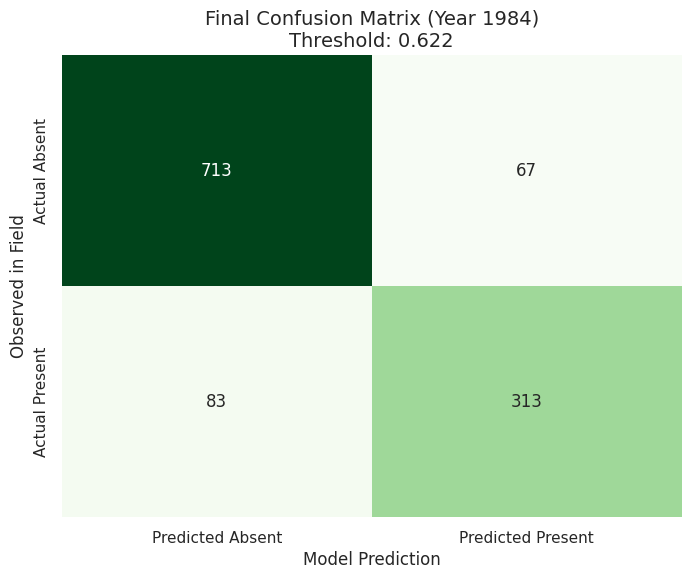

In [23]:
# 4. Create and Plot Confusion Matrix
cm = confusion_matrix(y, preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Absent', 'Predicted Present'],
            yticklabels=['Actual Absent', 'Actual Present'])

plt.title(f'Final Confusion Matrix (Year 1984)\nThreshold: {final_threshold}', fontsize=14)
plt.ylabel('Observed in Field')
plt.xlabel('Model Prediction')
plt.show()

Feature importance plotting

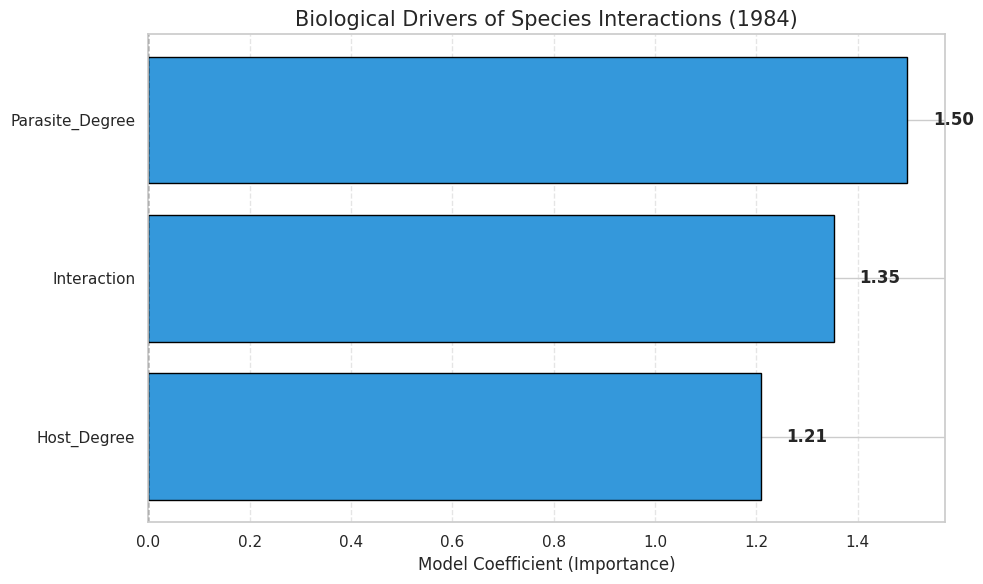

In [24]:
# 1. Extract coefficients from the final pipeline
# We look into the 'logistic' step of the pipeline
coefficients = final_pipeline.named_steps['logistic'].coef_[0]
feature_names = features # ['Host_Degree', 'Parasite_Degree', 'Interaction']

# 2. Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
}).sort_values(by='Weight', ascending=True)

# 3. Plotting
plt.figure(figsize=(10, 6))
colors = ['#3498db' if x > 0 else '#e74c3c' for x in importance_df['Weight']]

plt.barh(importance_df['Feature'], importance_df['Weight'], color=colors, edgecolor='black')
plt.axvline(0, color='black', lw=1, ls='--')

# Add labels for the exact values
for i, v in enumerate(importance_df['Weight']):
    plt.text(v + (0.05 if v > 0 else -0.3), i, f'{v:.2f}', va='center', fontweight='bold')

plt.title('Biological Drivers of Species Interactions (1984)', fontsize=15)
plt.xlabel('Model Coefficient (Importance)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

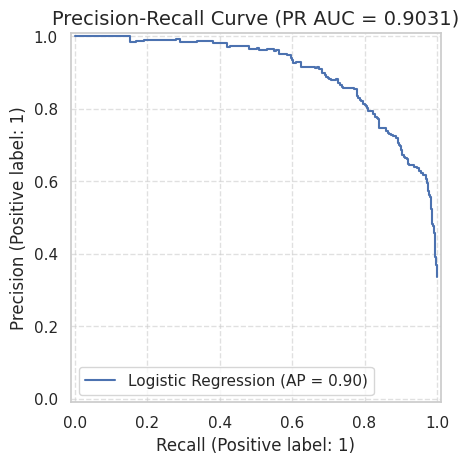

In [25]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# 1. Calculate the PR AUC score (using the 'probs' variable from Step 3)
# If you haven't run Step 3 yet, run that first!
pr_auc = average_precision_score(y, probs)

# 2. Plot the curve using 'final_pipeline' (the name from Step 3)
plt.figure(figsize=(8, 6))
display = PrecisionRecallDisplay.from_estimator(
    final_pipeline, X, y, name="Logistic Regression"
)

# 3. Add title and styling
plt.title(f'Precision-Recall Curve (PR AUC = {pr_auc:.4f})', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [34]:
# Assuming 'grid' is your fitted GridSearchCV object from the final training
best_settings = grid.best_params_

print("--- BEST HYPERPARAMETERS ---")
print(f"Regularization Strength (C): {best_settings['logistic__C']}")
print(f"Penalty Type: {best_settings['logistic__penalty']}")

# If you want to see exactly how these compare to your starting grid:
print(f"\nFull Parameter Set: {best_settings}")

--- BEST HYPERPARAMETERS ---
Regularization Strength (C): 1
Penalty Type: l1

Full Parameter Set: {'logistic__C': 1, 'logistic__penalty': 'l1'}


# Seeing if the model is beeter for mites only data

In [26]:
# --- COMPARISON STEP: MITES ONLY ---

# 1. Identify Mites (by excluding Fleas)
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]

# Get columns that are NOT fleas
all_parasites = wide_1984.columns
mite_cols = [c for c in all_parasites if c.split('_')[0] not in flea_genera]

# 2. Create the Mite-Only Dataframe
df_mites = wide_1984[mite_cols].reset_index().melt(id_vars='Host', var_name='Parasite', value_name='Prevalence')
df_mites['Is_Present'] = (df_mites['Prevalence'] > 0).astype(int)

# 3. Recalculate Features for Mites ONLY
h_deg_m = df_mites.groupby('Host')['Is_Present'].sum().reset_index(name='Host_Degree')
p_deg_m = df_mites.groupby('Parasite')['Is_Present'].sum().reset_index(name='Parasite_Degree')

df_mites = df_mites.merge(h_deg_m, on='Host').merge(p_deg_m, on='Parasite')
df_mites['Interaction'] = df_mites['Host_Degree'] * df_mites['Parasite_Degree']

X_m = df_mites[['Host_Degree', 'Parasite_Degree', 'Interaction']]
y_m = df_mites['Is_Present']

# 4. Run the Nested CV for Mites
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

auc_m, f1_m = [], []

print(f"--- Running Mite-Only Model ({len(mite_cols)} species) ---")

for train_idx, test_idx in outer_cv.split(X_m, y_m):
    X_train, X_test = X_m.iloc[train_idx], X_m.iloc[test_idx]
    y_train, y_test = y_m.iloc[train_idx], y_m.iloc[test_idx]

    grid_m = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc')
    grid_m.fit(X_train, y_train)

    # Threshold Optimization
    probs_tr = grid_m.predict_proba(X_train)[:, 1]
    pre, rec, th = precision_recall_curve(y_train, probs_tr)
    f1s = (2 * pre * rec) / (pre + rec + 1e-10)
    best_t = th[np.argmax(f1s)]

    # Test
    probs_te = grid_m.predict_proba(X_test)[:, 1]
    auc_m.append(roc_auc_score(y_test, probs_te))
    f1_m.append(f1_score(y_test, (probs_te >= best_t).astype(int)))

print(f"\nMITES ONLY Results:")
print(f"Mean AUC: {np.mean(auc_m):.4f} (vs 0.9410 Full)")
print(f"Mean F1: {np.mean(f1_m):.4f} (vs 0.8058 Full)")

--- Running Mite-Only Model (42 species) ---

MITES ONLY Results:
Mean AUC: 0.9419 (vs 0.9410 Full)
Mean F1: 0.7922 (vs 0.8058 Full)


Seeing if the model is beeter for fleas only data

In [27]:
# --- COMPARISON STEP: FLEAS ONLY ---

# 1. Identify Fleas based on the established genera list
flea_genera = [
    'Amphipsylla', 'Ceratophyllus', 'Ctenophthalmus', 'Megabothris',
    'Amalaraeus', 'Doratopsylla', 'Frontopsylla', 'Histrichopsylla',
    'Leptopsylla', 'Neopsylla', 'Palaeopsylla', 'Rhadinopsylla'
]

# Get columns that belong to the Flea group
all_parasites = wide_1984.columns
flea_cols = [c for c in all_parasites if c.split('_')[0] in flea_genera]

# 2. Create the Flea-Only Dataframe (Long format)
df_fleas = wide_1984[flea_cols].reset_index().melt(id_vars='Host', var_name='Parasite', value_name='Prevalence')
df_fleas['Is_Present'] = (df_fleas['Prevalence'] > 0).astype(int)

# 3. Recalculate Features for Fleas ONLY
# (Degree must be recalculated because a host might have 10 mites but only 2 fleas)
h_deg_f = df_fleas.groupby('Host')['Is_Present'].sum().reset_index(name='Host_Degree')
p_deg_f = df_fleas.groupby('Parasite')['Is_Present'].sum().reset_index(name='Parasite_Degree')

df_fleas = df_fleas.merge(h_deg_f, on='Host').merge(p_deg_f, on='Parasite')
df_fleas['Interaction'] = df_fleas['Host_Degree'] * df_fleas['Parasite_Degree']

# Define Features and Target
X_f = df_fleas[['Host_Degree', 'Parasite_Degree', 'Interaction']]
y_f = df_fleas['Is_Present']

# 4. Run the Nested CV for Fleas
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

auc_f, f1_f = [], []

print(f"--- Running Flea-Only Model ({len(flea_cols)} species) ---")

for train_idx, test_idx in outer_cv.split(X_f, y_f):
    X_train, X_test = X_f.iloc[train_idx], X_f.iloc[test_idx]
    y_train, y_test = y_f.iloc[train_idx], y_f.iloc[test_idx]

    # Hyperparameter Tuning
    grid_f = GridSearchCV(pipeline, param_grid, cv=inner_cv, scoring='roc_auc')
    grid_f.fit(X_train, y_train)

    # Threshold Optimization for F1
    probs_tr = grid_f.predict_proba(X_train)[:, 1]
    pre, rec, th = precision_recall_curve(y_train, probs_tr)
    f1s = (2 * pre * rec) / (pre + rec + 1e-10)
    best_t = th[np.argmax(f1s)]

    # Evaluation on Unseen Test Set
    probs_te = grid_f.predict_proba(X_test)[:, 1]
    auc_f.append(roc_auc_score(y_test, probs_te))
    f1_f.append(f1_score(y_test, (probs_te >= best_t).astype(int)))

print(f"\nFLEAS ONLY Results:")
print(f"Mean AUC: {np.mean(auc_f):.4f} (Full: 0.9410)")
print(f"Mean F1: {np.mean(f1_f):.4f} (Full: 0.8058)")

--- Running Flea-Only Model (14 species) ---

FLEAS ONLY Results:
Mean AUC: 0.9467 (Full: 0.9410)
Mean F1: 0.8430 (Full: 0.8058)


In [30]:
# 1. Access the 'logistic' step of the pipeline
# 2. Use the .intercept_ attribute to get beta_0
beta_0 = final_pipeline.named_steps['logistic'].intercept_[0]

print(f"The Intercept (Beta 0) is: {beta_0:.4f}")

The Intercept (Beta 0) is: -0.4746
